# Importing all Libries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import re
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
import xgboost
from xgboost import XGBRegressor
from sklearn.preprocessing import PowerTransformer
import scipy.stats as stats

# Model selection libraries
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.model_selection import cross_val_score, GridSearchCV

from sklearn.metrics import r2_score, mean_squared_error
from collections import OrderedDict

# Dataset

In [2]:
df=pd.read_csv("C:/Users/User/Documents/logistics 2/training_raw_file.csv")

In [3]:
df.head()

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,...,30,19,551.0,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,NaN
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,...,240,1000,6200.0,6.20,0.03,"Aurobindo Unit III, India",Yes,358,4521.5,NaN
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,...,100,500,40000.0,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78,NaN
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,31920,127360.8,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855,16007.06,NaN
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,38000,121600.0,3.20,0.05,"Aurobindo Unit III, India",Yes,7590,45450.08,NaN


In [4]:
df.size

340692

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            10324 non-null  int64  
 1   Project Code                  10324 non-null  object 
 2   PQ #                          10324 non-null  object 
 3   PO / SO #                     10324 non-null  object 
 4   ASN/DN #                      10324 non-null  object 
 5   Country                       10324 non-null  object 
 6   Managed By                    10324 non-null  object 
 7   Fulfill Via                   10324 non-null  object 
 8   Vendor INCO Term              10324 non-null  object 
 9   Shipment Mode                 9964 non-null   object 
 10  PQ First Sent to Client Date  10324 non-null  object 
 11  PO Sent to Vendor Date        10324 non-null  object 
 12  Scheduled Delivery Date       10324 non-null  object 
 13  D

In [6]:
df.describe()

,ID,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Line Item Insurance (USD)
count,10324.000000,10324.000000,10324.000000,1.032400e+04,10324.000000,10324.000000,10037.000000
mean,51098.968229,77.990895,18332.534870,1.576506e+05,21.910241,0.611701,240.117626
std,31944.332496,76.579764,40035.302961,3.452921e+05,45.609223,3.275808,500.190568
min,1.000000,1.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,12795.750000,30.000000,408.000000,4.314593e+03,4.120000,0.080000,6.510000
50%,57540.500000,60.000000,3000.000000,3.047147e+04,9.300000,0.160000,47.040000
75%,83648.250000,90.000000,17039.750000,1.664471e+05,23.592500,0.470000,252.400000
max,86823.000000,1000.000000,619999.000000,5.951990e+06,1345.640000,238.650000,7708.440000


# Data Cleaning and processing

In [7]:
df.isnull().sum()

ID                                 0
Project Code                       0
PQ #                               0
PO / SO #                          0
ASN/DN #                           0
Country                            0
Managed By                         0
Fulfill Via                        0
Vendor INCO Term                   0
Shipment Mode                    360
PQ First Sent to Client Date       0
PO Sent to Vendor Date             0
Scheduled Delivery Date            0
Delivered to Client Date           0
Delivery Recorded Date             0
Product Group                      0
Sub Classification                 0
Vendor                             0
Item Description                   0
Molecule/Test Type                 0
Brand                              0
Dosage                          1736
Dosage Form                        0
Unit of Measure (Per Pack)         0
Line Item Quantity                 0
Line Item Value                    0
Pack Price                         0
U

In [8]:
obj_cols=[x for x in df.columns if df[x].dtypes=="O"]

In [9]:
obj_cols

['Project Code',
 'PQ #',
 'PO / SO #',
 'ASN/DN #',
 'Country',
 'Managed By',
 'Fulfill Via',
 'Vendor INCO Term',
 'Shipment Mode',
 'PQ First Sent to Client Date',
 'PO Sent to Vendor Date',
 'Scheduled Delivery Date',
 'Delivered to Client Date',
 'Delivery Recorded Date',
 'Product Group',
 'Sub Classification',
 'Vendor',
 'Item Description',
 'Molecule/Test Type',
 'Brand',
 'Dosage',
 'Dosage Form',
 'Manufacturing Site',
 'First Line Designation',
 'Weight (Kilograms)',
 'Freight Cost (USD)']

In [10]:
num_col=[y for y in df.columns if df[y].dtypes == 'int64' or df[y].dtypes=='float64']

In [11]:
num_col

['ID',
 'Unit of Measure (Per Pack)',
 'Line Item Quantity',
 'Line Item Value',
 'Pack Price',
 'Unit Price',
 'Line Item Insurance (USD)']

<AxesSubplot:>

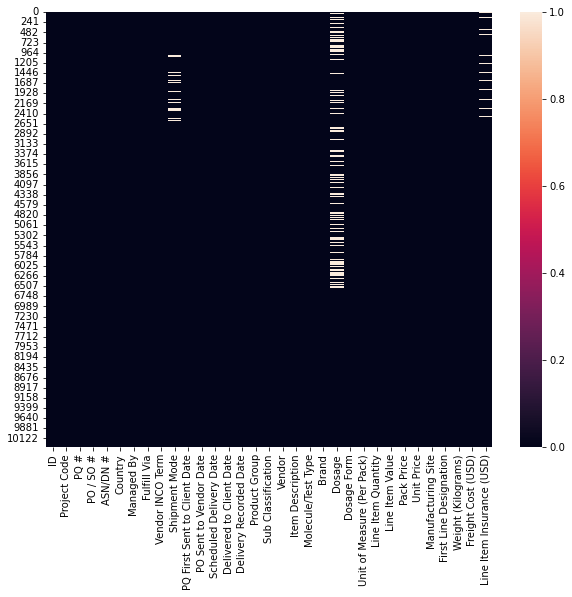

In [12]:
plt.figure(figsize=(10,8))
sns.heatmap(df.isna())

In [13]:
missing_df=df[['Shipment Mode','Line Item Insurance (USD)']]

In [14]:
missing_df

,Shipment Mode,Line Item Insurance (USD)
0,Air,NaN
1,Air,NaN
2,Air,NaN
3,Air,NaN
4,Air,NaN
...,...,...
10319,Truck,705.79
10320,Truck,161.71
10321,Truck,5284.04
10322,Truck,134.03


In [15]:
df['Shipment Mode'].fillna(value='Air',inplace=True)

In [16]:
df['Line Item Insurance (USD)']=df['Line Item Insurance (USD)'].fillna(0)

In [17]:
df['Shipment Mode'].isna().sum()

0

In [18]:
def Custome_Summary(my_df):
    result = []
    for col in my_df.columns:
        if my_df[col].dtypes != 'object':
            stats = OrderedDict({
                "Feature Name" :col,
                "Count": my_df[col].count(),
                "Minimum": my_df[col].min(),
                "Quartile1" : my_df[col].quantile(0.25),
                "Quartile2" : my_df[col].quantile(0.50),
                "Quartile3" : my_df[col].quantile(0.75),
                "Mean": my_df[col].mean(),
                "Variance": round(my_df[col].var()),
                "Standar_Deviation": my_df[col].std(),
                "Skewness" : my_df[col].skew(),
                "Kurtosis" : my_df[col].kurt()
                
                
            })
            result.append(stats)
    result_df = pd.DataFrame(result)
    #Skwness type :
    Skwness_lable  = []
    for i in result_df["Skewness"]:
        if i <=-1 :
            Skwness_lable.append("Highly negative skew ")
        elif -1 < i <= -0.5:
            Skwness_lable.append("Moderately  negative skew ")
    
        elif -0.5 < i < 0:
            Skwness_lable.append(" Fairly  negative skew ")
        elif 0 <= i < 0.5:
            Skwness_lable.append(" Fairly  Postive skew ")
        elif 0.5 <= i < 1:
            Skwness_lable.append(" Moderately Positive  skew ")
        elif i >= 1:
            Skwness_lable.append("Highly Positive  skew ")
        
    result_df["Skewness Comment "] = Skwness_lable 
     
    #Kurto type :
    Kurtosis_lable  = []
    for i in result_df["Kurtosis"]:
        if i >=  1 :
            Kurtosis_lable.append("Lepto  ")
        elif i <= -1:
            Kurtosis_lable.append("Plato  ")
        else :
            Kurtosis_lable.append(" Meso  ")
        
    result_df["Kurtosis Comment "] =  Kurtosis_lable 
    
    
    Outliers_lable = []
    for col in my_df.columns:
        if my_df[col].dtypes != 'object':
            Q1 = my_df[col].quantile(0.25)
            Q2 = my_df[col].quantile(0.50)
            Q3 = my_df[col].quantile(0.75)
            IQR = Q3 - Q1
            LW = Q1 - 1.5*IQR
            UW = Q3 + 1.5*IQR
            if len(my_df[(my_df[col]< LW)|(my_df[col] > UW)]) > 0:
                Outliers_lable.append("Have outliers")
            else:
                Outliers_lable.append("No Outliers")
    result_df["Outlier Comment"] = Outliers_lable
    
    return  result_df

In [19]:
Custome_Summary(df)

,Feature Name,Count,Minimum,Quartile1,Quartile2,Quartile3,Mean,Variance,Standar_Deviation,Skewness,Kurtosis,Skewness Comment,Kurtosis Comment,Outlier Comment
0,ID,10324,1.0,12795.7500,57540.500,83648.2500,51098.968229,1020440379,31944.332496,-0.230367,-1.639837,Fairly negative skew,Plato,No Outliers
1,Unit of Measure (Per Pack),10324,1.0,30.0000,60.000,90.0000,77.990895,5864,76.579764,4.302502,36.093999,Highly Positive skew,Lepto,Have outliers
2,Line Item Quantity,10324,1.0,408.0000,3000.000,17039.7500,18332.534870,1602825483,40035.302961,5.038315,40.050300,Highly Positive skew,Lepto,Have outliers
3,Line Item Value,10324,0.0,4314.5925,30471.465,166447.1400,157650.567347,119226611519,345292.066979,5.837020,54.152430,Highly Positive skew,Lepto,Have outliers
4,Pack Price,10324,0.0,4.1200,9.300,23.5925,21.910241,2080,45.609223,12.988432,293.176204,Highly Positive skew,Lepto,Have outliers
5,Unit Price,10324,0.0,0.0800,0.160,0.4700,0.611701,11,3.275808,40.584849,2725.960252,Highly Positive skew,Lepto,Have outliers
6,Line Item Insurance (USD),10324,0.0,5.2425,42.815,241.7500,233.442523,244793,494.765813,4.886300,35.764084,Highly Positive skew,Lepto,Have outliers


In [20]:
df['PO / SO #'].value_counts()

SCMS-199289    67
SCMS-199283    63
SCMS-183950    55
SCMS-215370    38
SCMS-259075    38
               ..
SCMS-260830     1
SCMS-283040     1
SCMS-149030     1
SCMS-234070     1
SO-51680        1
Name: PO / SO #, Length: 6233, dtype: int64

In [21]:
def reorder(df):
  df_split=df.split("-")
  df_return=df_split[0]
  return df_return

In [22]:
df['PO / SO #']=df['PO / SO #'].apply(reorder)

In [23]:
df['PO / SO #'].value_counts()

SO      5404
SCMS    4919
DSCM       1
Name: PO / SO #, dtype: int64

In [24]:
df['ASN/DN #'].value_counts()

ASN-19166    54
ASN-24415    38
ASN-23875    26
ASN-32138    19
ASN-28034    17
             ..
ASN-11200     1
ASN-23000     1
ASN-19497     1
ASN-24569     1
DN-4334       1
Name: ASN/DN #, Length: 7030, dtype: int64

In [25]:
df['ASN/DN #']=df['ASN/DN #'].apply(reorder)

In [26]:
df['Vendor INCO Term']=df['Vendor INCO Term'].replace(['DAP','DDU','CIF'],'Others')

In [27]:
df['PQ First Sent to Client Date'].value_counts()

Pre-PQ Process       2476
Date Not Captured     205
9/11/14               205
7/11/13               173
4/30/14               123
                     ... 
7/29/10                 1
10/3/11                 1
12/17/13                1
2/5/15                  1
8/29/13                 1
Name: PQ First Sent to Client Date, Length: 765, dtype: int64

In [28]:
df['PQ First Sent to Client Date'].min()

'1/10/12'

In [29]:
df['PQ First Sent to Client Date'].max()

'Pre-PQ Process'

In [30]:
df

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,1,100-CI-T01,Pre-PQ Process,SCMS,ASN,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,...,30,19,551.00,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,0.00
1,3,108-VN-T01,Pre-PQ Process,SCMS,ASN,Vietnam,PMO - US,Direct Drop,EXW,Air,...,240,1000,6200.00,6.20,0.03,"Aurobindo Unit III, India",Yes,358,4521.5,0.00
2,4,100-CI-T01,Pre-PQ Process,SCMS,ASN,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,...,100,500,40000.00,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78,0.00
3,15,108-VN-T01,Pre-PQ Process,SCMS,ASN,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,31920,127360.80,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855,16007.06,0.00
4,16,108-VN-T01,Pre-PQ Process,SCMS,ASN,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,38000,121600.00,3.20,0.05,"Aurobindo Unit III, India",Yes,7590,45450.08,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10319,86818,103-ZW-T30,FPQ-15197,SO,DN,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,...,60,166571,599655.60,3.60,0.06,"Mylan, H-12 & H-13, India",No,See DN-4307 (ID#:83920),See DN-4307 (ID#:83920),705.79
10320,86819,104-CI-T30,FPQ-15259,SO,DN,Côte d'Ivoire,PMO - US,From RDC,N/A - From RDC,Truck,...,60,21072,137389.44,6.52,0.11,Hetero Unit III Hyderabad IN,No,See DN-4313 (ID#:83921),See DN-4313 (ID#:83921),161.71
10321,86821,110-ZM-T30,FPQ-14784,SO,DN,Zambia,PMO - US,From RDC,N/A - From RDC,Truck,...,30,514526,5140114.74,9.99,0.33,Cipla Ltd A-42 MIDC Mahar. IN,No,Weight Captured Separately,Freight Included in Commodity Cost,5284.04
10322,86822,200-ZW-T30,FPQ-16523,SO,DN,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,...,60,17465,113871.80,6.52,0.11,Mylan (formerly Matrix) Nashik,Yes,1392,Freight Included in Commodity Cost,134.03


In [31]:
def client_dates(date):
    if date=="Pre-PQ Process":
        return pd.to_datetime('01/06/2009',format="%d/%m/%Y")
    elif date=="Date Not Captured":
        return "Date Not Captured"
    else:
        if len(date)<9:
            date=pd.to_datetime(date,format="%m/%d/%y")
            return date
        else:
            date=date.replace("-","/")
            date=pd.to_datetime(date,format="%d/%m/%Y")
            return date

In [32]:
df['PQ First Sent to Client Date']=df['PQ First Sent to Client Date'].apply(client_dates)

In [33]:
df['Scheduled Delivery Date'] = pd.to_datetime(df['Scheduled Delivery Date'])
df['Delivered to Client Date'] = pd.to_datetime(df['Delivered to Client Date'])
df['Delivery Recorded Date'] = pd.to_datetime(df['Delivery Recorded Date'])

In [34]:
df['Weight (Kilograms)']

0                                13
1                               358
2                               171
3                              1855
4                              7590
                    ...            
10319       See DN-4307 (ID#:83920)
10320       See DN-4313 (ID#:83921)
10321    Weight Captured Separately
10322                          1392
10323    Weight Captured Separately
Name: Weight (Kilograms), Length: 10324, dtype: object

In [35]:
def values_replacement(size):
    for i in range(size):
        weight = df['Weight (Kilograms)'][i]
        if 'See' in weight:
            id = weight.split(':')[1].split(')')[0]

            actual_weight_of_id =  df[df['ID']==int(id)]['Weight (Kilograms)'].values[0]
            df['Weight (Kilograms)'][i] = actual_weight_of_id 
        cost = df['Freight Cost (USD)'][i]
        if 'See' in cost:
            id = cost.split(':')[1].split(')')[0]
     
            actual_cost_of_id =  df[df['ID']==int(id)]['Freight Cost (USD)'].values[0]
            df['Freight Cost (USD)'][i]= actual_cost_of_id

In [36]:
values_replacement(len(df))

C:\Users\User\AppData\Local\Temp\ipykernel_13548\1245861725.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Weight (Kilograms)'][i] = actual_weight_of_id
C:\Users\User\AppData\Local\Temp\ipykernel_13548\1245861725.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Freight Cost (USD)'][i]= actual_cost_of_id


In [37]:
df["Freight Cost (USD)"]=df["Freight Cost (USD)"].replace("Freight Included in Commodity Cost",0)

In [38]:
df = df[df['Freight Cost (USD)']!='Invoiced Separately']

In [39]:
df = df[df['Weight (Kilograms)']!='Weight Captured Separately']

In [40]:
df['Weight (Kilograms)'] = df['Weight (Kilograms)'].astype(float)
df['Freight Cost (USD)'] = df['Freight Cost (USD)'].astype(float)

In [41]:
consignmemt_price = df['Line Item Value'] + df['Freight Cost (USD)'] + df['Line Item Insurance (USD)']

df['consignment_price'] = consignmemt_price 

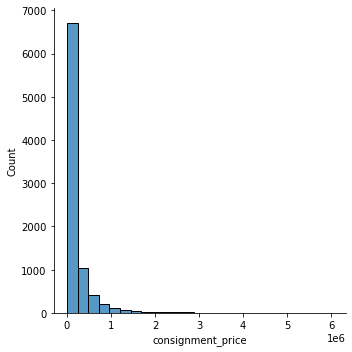

In [42]:
sns.displot(df['consignment_price'],bins=25)

In [43]:
df.isna().mean()*100

ID                               0.000000
Project Code                     0.000000
PQ #                             0.000000
PO / SO #                        0.000000
ASN/DN #                         0.000000
Country                          0.000000
Managed By                       0.000000
Fulfill Via                      0.000000
Vendor INCO Term                 0.000000
Shipment Mode                    0.000000
PQ First Sent to Client Date     0.000000
PO Sent to Vendor Date           0.000000
Scheduled Delivery Date          0.000000
Delivered to Client Date         0.000000
Delivery Recorded Date           0.000000
Product Group                    0.000000
Sub Classification               0.000000
Vendor                           0.000000
Item Description                 0.000000
Molecule/Test Type               0.000000
Brand                            0.000000
Dosage                          17.769594
Dosage Form                      0.000000
Unit of Measure (Per Pack)       0

Outlier Detection 


In [44]:
def replace_outlier(my_df,col,method = 'Quartile',strategy = 'Median'):
    col_data = my_df[col]
    if method == 'Quartile':
        # Using quartile to calculate IQR
        q1 = col_data.quantile(0.25)
        q2 = col_data.quantile(0.50)
        q3 = col_data.quantile(0.75) 
        IQR = q3 - q1
        LW = q1 - 1.5*IQR
        UW = q3 + 1.5*IQR
        
    elif method == 'Standerd Deviation':
        # using SD method 
        mean = col_data.mean()
        std = col_data.std()
        LW = mean - 2*std
        UW = mean + 2*std
    else:
        print("Pass a correct method")
    
    # Printing all the outliers 
    
    outliers = my_df.loc[(col_data < LW) | (col_data > UW)]
    outlier_density = round(len(outliers)/len(my_df),2)*100
    
    if len(outliers) == 0:
        print(f'Feature {col} does not have outliers ')
        print("\n")
    else:
        print(f'Feature {col} has outliers')
        print('\n')
        print(f'Total no. of outliers in {col} are {len(outliers)} ')
        print('\n')
        print(f'Outlier percentage in {col} is {outlier_density}% ')
        print('\n')
        display(my_df[(col_data < LW) | (col_data > UW)])
    
    
    # Replacing outliers
    if strategy == 'Median':
        my_df.loc[(col_data < LW) | (col_data > UW), col] = q2
    elif strategy == 'Mean':
        my_df.loc[(col_data < LW) | (col_data > UW), col] = mean
    else:
        print('Pass a correct strategy')
        
    return my_df
    
    

In [45]:
def odt_plots(my_df,col):
    f,(ax1,ax2,ax3) = plt.subplots(1,3, figsize = (25,8)) # one row and 3 colums 
    
    # Descriptive stat box plot 
    sns.boxplot(my_df[col],ax = ax1)
    ax1.set_title(col + 'boxplot')
    ax1.set_xlabel("Values")
    ax1.set_ylabel("Boxplot")
    
    
    # Ploting Histogram with outliers
    sns.distplot(my_df[col],ax = ax2, fit = stats.norm)
    ax2.axvline(my_df[col].mean(), color = 'green')
    ax2.axvline(my_df[col].median(),color = 'brown')
    ax2.set_title(col + 'Histogram with outliers')
    ax2.set_ylabel("Density")
    ax2.set_xlabel("values")
    
    # Replacing outliers
    df_out = replace_outlier(my_df,col)
    
    
    # Ploting histogram without outliers 
    sns.distplot(df_out[col],ax = ax3,fit = stats.norm)
    ax3.axvline(df_out[col].mean(), color = 'green')
    ax3.axvline(df_out[col].median(),color = 'brown')
    ax3.set_title(col + 'Histogram without outliers')
    ax3.set_ylabel("Density")
    ax3.set_xlabel("values")
    plt.show()

In [46]:
df1=df.copy()
df1=df1.select_dtypes(np.number)

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Feature ID does not have outliers 




C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


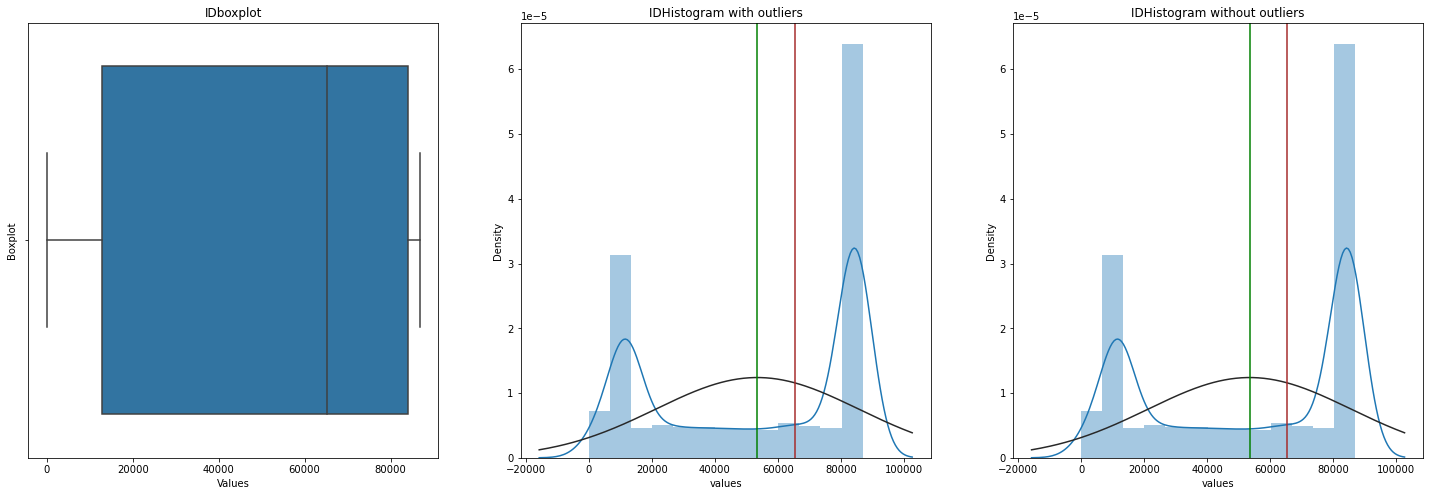

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Feature Unit of Measure (Per Pack) has outliers


Total no. of outliers in Unit of Measure (Per Pack) are 756 


Outlier percentage in Unit of Measure (Per Pack) is 9.0% 




,ID,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD),consignment_price
1,3,240,1000,6200.00,6.20,0.03,358.0,4521.50,0.00,10721.50
5,23,240,416,2225.60,5.35,0.02,504.0,5920.42,0.00,8146.02
18,87,200,712,8964.08,12.59,0.06,162.0,912.96,0.00,9877.04
22,115,240,1000,1920.00,1.92,0.01,941.0,4193.49,3.07,6116.56
63,630,540,34,1547.68,45.52,0.08,115.0,1755.87,2.48,3306.03
...,...,...,...,...,...,...,...,...,...,...
10209,86630,240,135,195.75,1.45,0.01,392.0,4523.00,0.24,4718.99
10227,86661,240,4584,8526.24,1.86,0.01,28696.0,22890.82,8.76,31425.82
10239,86674,240,4157,5944.51,1.43,0.01,1385.0,6437.76,6.11,12388.38
10289,86782,240,24871,37555.21,1.51,0.01,9674.0,7921.00,44.20,45520.41


C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


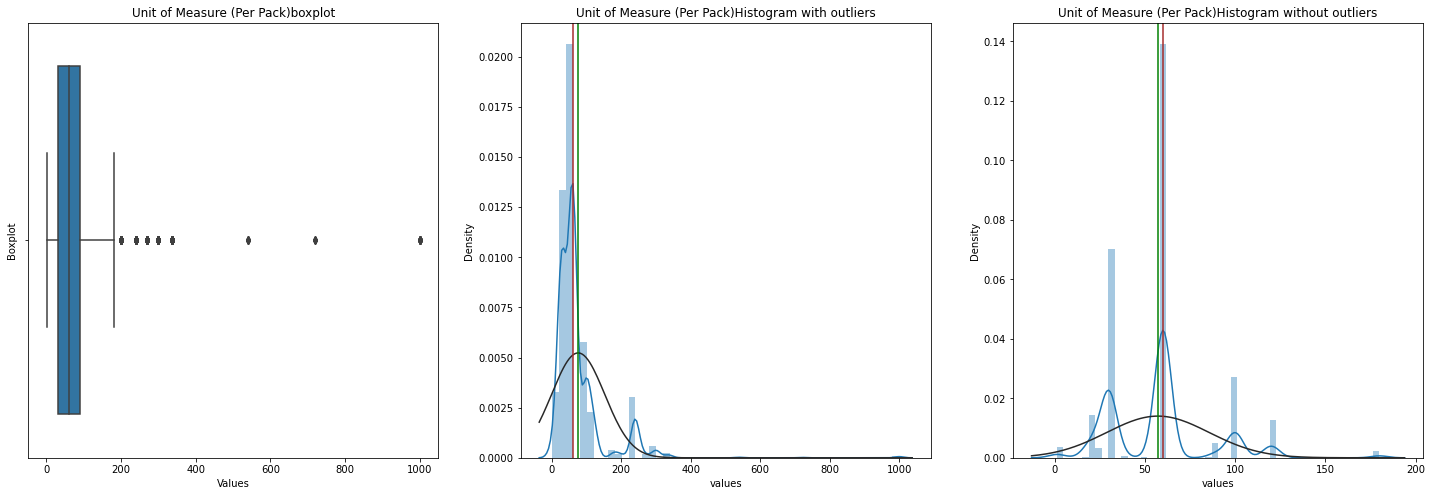

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Feature Line Item Quantity has outliers


Total no. of outliers in Line Item Quantity are 1038 


Outlier percentage in Line Item Quantity is 12.0% 




,ID,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD),consignment_price
29,161,60,64000,99200.00,1.55,0.03,4228.0,12237.61,158.72,111596.33
118,1156,30,55356,386384.88,6.98,0.23,4482.0,37404.74,757.31,424546.93
136,1283,60,95500,144205.00,1.51,0.03,9170.0,42453.21,0.00,186658.21
139,1298,60,70000,525000.00,7.50,0.12,6813.0,31858.09,0.00,556858.09
140,1299,30,71577,1087970.40,15.20,0.51,7416.0,64179.42,0.00,1152149.82
...,...,...,...,...,...,...,...,...,...,...
10303,86800,30,200000,1920000.00,9.60,0.32,26603.0,19194.37,2259.84,1941454.21
10305,86802,60,300000,2316000.00,7.72,0.13,39688.0,28277.42,2725.93,2347003.35
10315,86814,120,70000,1304800.00,18.64,0.16,15198.0,26180.00,1341.33,1332321.33
10318,86817,60,205243,738874.80,3.60,0.06,25880.0,46111.55,869.66,785856.01


C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


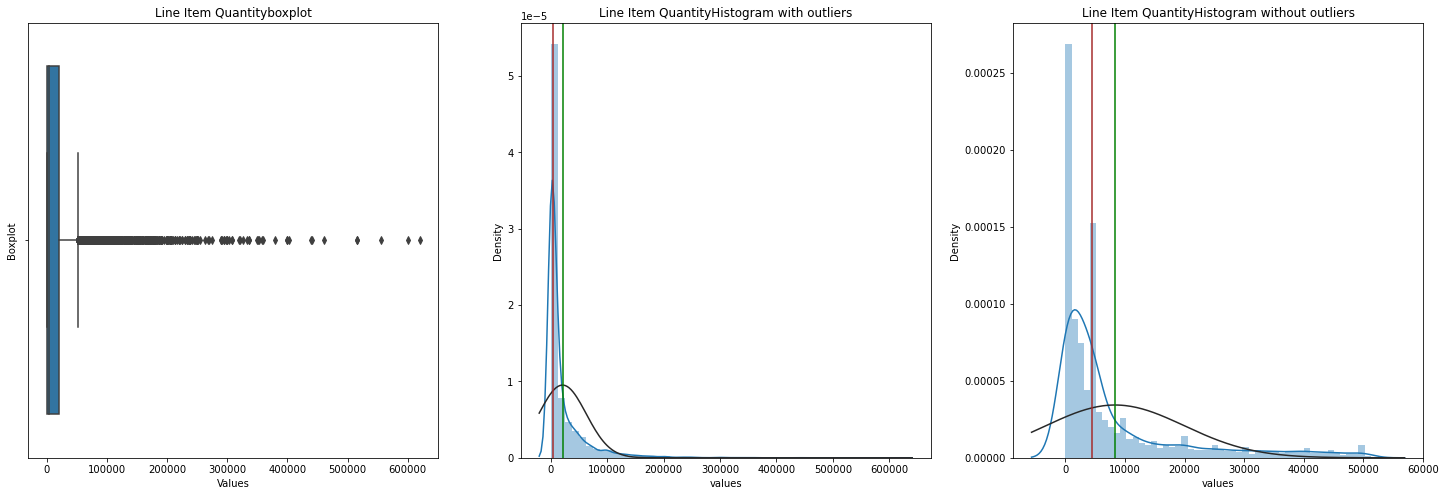

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Feature Line Item Value has outliers


Total no. of outliers in Line Item Value are 882 


Outlier percentage in Line Item Value is 10.0% 




,ID,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD),consignment_price
82,858,30,50000,2520000.0,50.40,1.68,4093.0,9339.00,4939.20,2534278.20
116,1134,100,7500,600000.0,80.00,0.80,2215.0,16835.31,1176.00,618011.31
117,1140,100,6395,511600.0,80.00,0.80,1915.0,24514.33,1002.74,537117.07
139,1298,60,4399,525000.0,7.50,0.12,6813.0,31858.09,0.00,556858.09
140,1299,30,4399,1087970.4,15.20,0.51,7416.0,64179.42,0.00,1152149.82
...,...,...,...,...,...,...,...,...,...,...
10303,86800,30,4399,1920000.0,9.60,0.32,26603.0,19194.37,2259.84,1941454.21
10305,86802,60,4399,2316000.0,7.72,0.13,39688.0,28277.42,2725.93,2347003.35
10315,86814,120,4399,1304800.0,18.64,0.16,15198.0,26180.00,1341.33,1332321.33
10318,86817,60,4399,738874.8,3.60,0.06,25880.0,46111.55,869.66,785856.01


C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


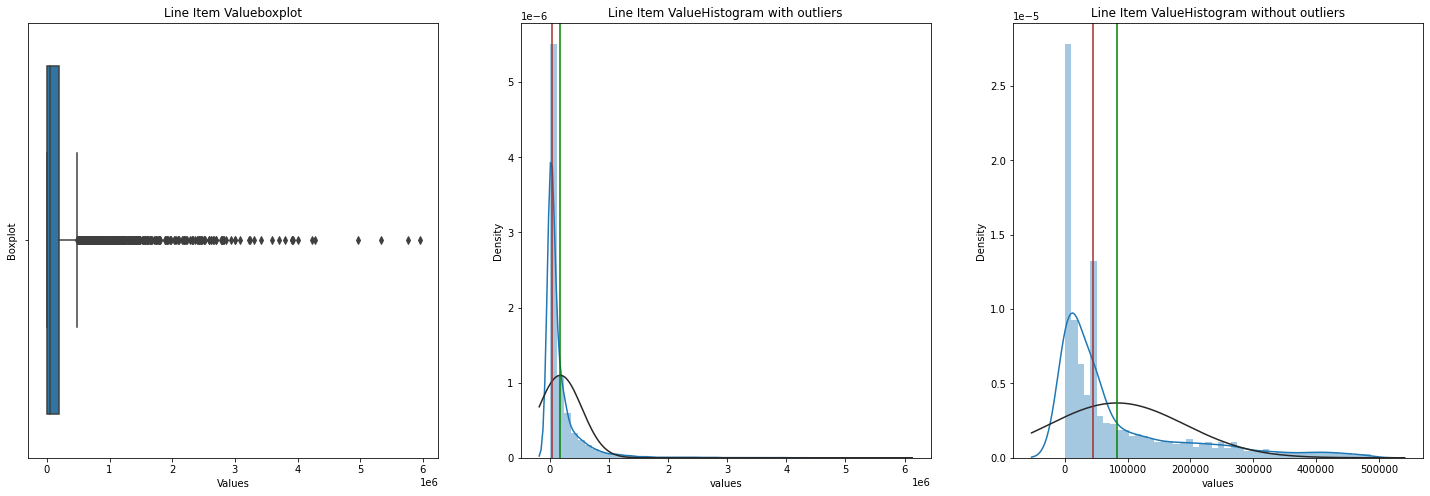

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Feature Pack Price has outliers


Total no. of outliers in Pack Price are 1011 


Outlier percentage in Pack Price is 12.0% 




,ID,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD),consignment_price
2,4,100,500,40000.0,80.00,0.80,171.0,1653.78,0.00,41653.78
14,65,100,750,60000.0,80.00,0.80,256.0,1760.32,0.00,61760.32
19,92,100,1000,80000.0,80.00,0.80,341.0,2682.47,128.00,82810.47
23,116,120,500,41095.0,82.19,0.68,117.0,1767.38,65.75,42928.13
24,130,100,750,53992.5,71.99,0.72,171.0,3518.38,86.39,57597.27
...,...,...,...,...,...,...,...,...,...,...
7490,83390,180,32,1600.0,50.00,0.28,132.0,8329.13,3.45,9932.58
8162,84177,100,1500,120000.0,80.00,0.80,448.0,2757.40,168.24,122925.64
9335,85627,60,168,13540.8,80.60,0.30,85.0,1139.50,26.54,14706.84
9366,85658,180,450,22500.0,50.00,0.28,101.0,6036.98,48.51,28585.49


C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


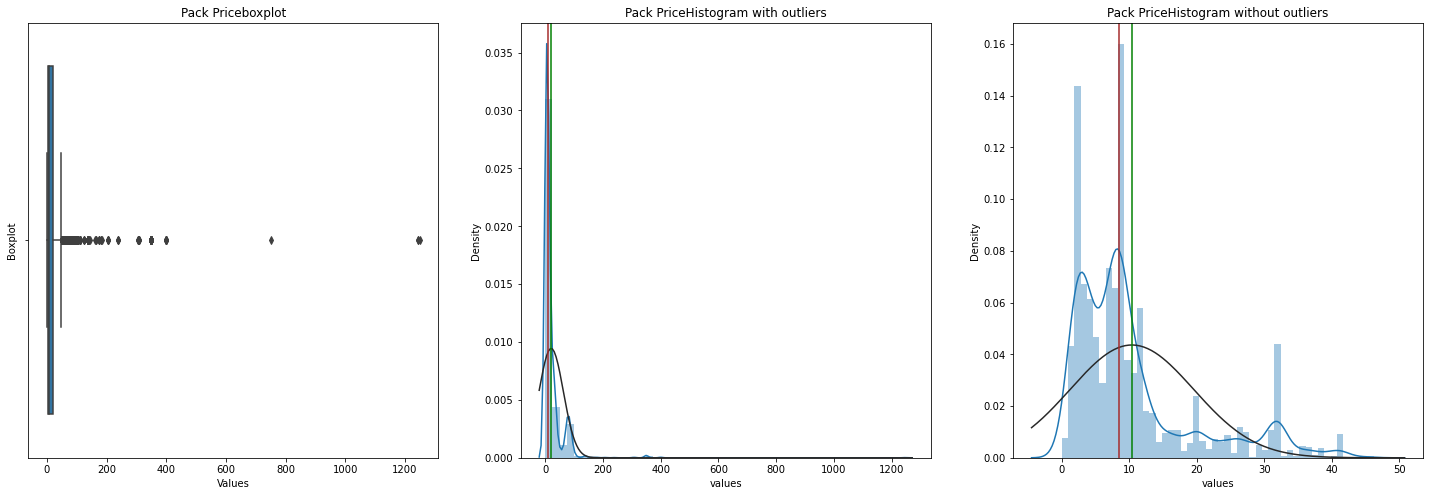

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Feature Unit Price has outliers


Total no. of outliers in Unit Price are 769 


Outlier percentage in Unit Price is 9.0% 




,ID,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD),consignment_price
0,1,30,19,551.0,29.0,0.97,13.0,780.34,0.00,1331.34
11,61,20,2500,100000.0,40.0,2.00,853.0,13569.49,0.00,113569.49
20,96,20,7500,202500.0,27.0,1.35,2278.0,15893.71,0.00,218393.71
25,134,100,25,8750.0,8.5,3.50,60.0,3097.85,14.00,11861.85
30,176,20,10000,270000.0,27.0,1.35,3263.0,20885.78,432.00,291317.78
...,...,...,...,...,...,...,...,...,...,...
6547,81757,20,7500,240000.0,32.0,1.60,2440.0,37115.71,396.00,277511.71
6558,81968,20,167,5344.0,32.0,1.60,61.0,925.05,7.49,6276.54
6562,82004,20,1513,48416.0,32.0,1.60,410.0,5577.13,67.88,54061.01
6759,82461,20,1000,32000.0,32.0,1.60,334.0,3494.50,44.86,35539.36


C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


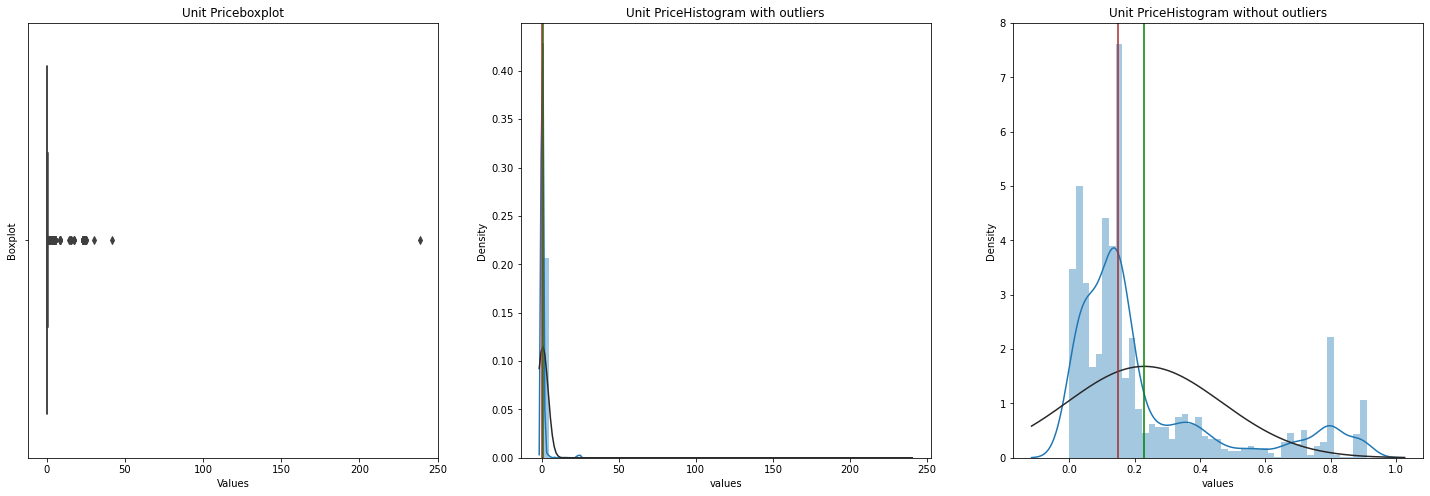

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Feature Weight (Kilograms) has outliers


Total no. of outliers in Weight (Kilograms) are 892 


Outlier percentage in Weight (Kilograms) is 10.0% 




,ID,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD),consignment_price
284,2685,30,4399,45628.00,16.75,0.56,11179.0,49824.57,0.00,1067956.57
417,3972,100,2500,200000.00,8.50,0.80,857354.0,5157.65,0.00,205157.65
530,5278,60,33333,120332.13,3.61,0.06,11179.0,49824.57,0.00,170156.70
536,5293,100,230,18400.00,8.50,0.80,38681.0,801.54,0.00,19201.54
661,6608,100,600,48000.00,8.50,0.80,205503.0,4110.88,0.00,52110.88
...,...,...,...,...,...,...,...,...,...,...
10307,86805,60,46752,168307.20,3.60,0.06,13469.0,16679.87,198.10,185185.17
10313,86812,30,19996,62387.52,3.12,0.10,17769.0,36897.57,64.13,99349.22
10315,86814,120,4399,45628.00,18.64,0.16,15198.0,26180.00,1341.33,1332321.33
10318,86817,60,4399,45628.00,3.60,0.06,25880.0,46111.55,869.66,785856.01


C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


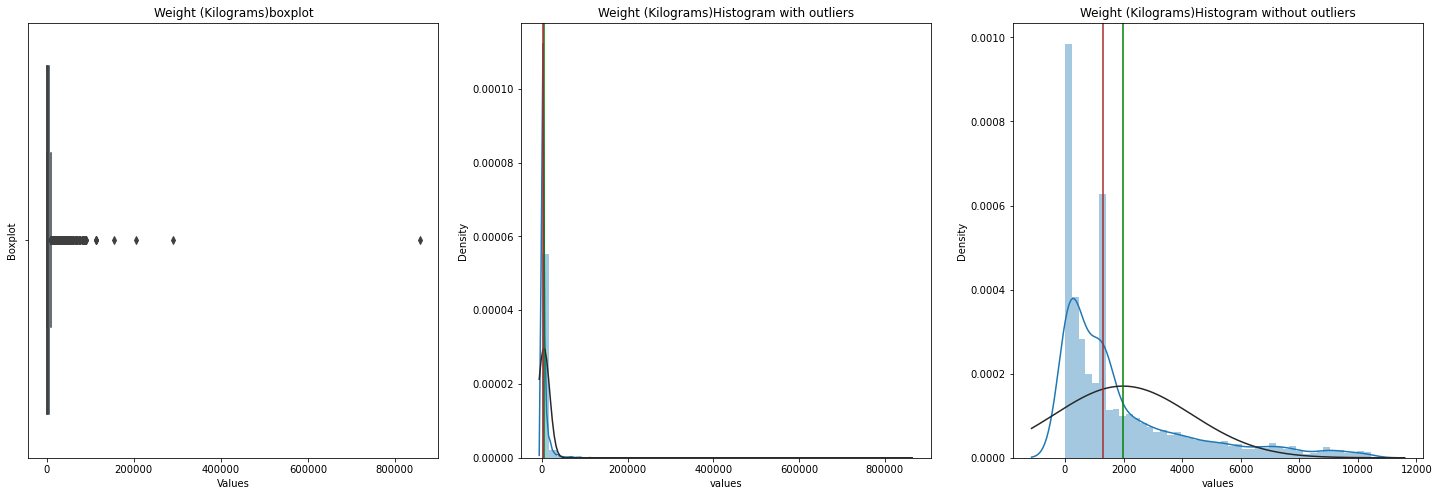

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Feature Freight Cost (USD) has outliers


Total no. of outliers in Freight Cost (USD) are 628 


Outlier percentage in Freight Cost (USD) is 7.000000000000001% 




,ID,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD),consignment_price
4,16,60,38000,121600.00,3.20,0.05,7590.0,45450.08,0.00,167050.08
13,64,60,10000,99800.00,9.98,0.17,7416.0,64179.42,0.00,163979.42
118,1156,30,4399,386384.88,6.98,0.23,4482.0,37404.74,757.31,424546.93
136,1283,60,4399,144205.00,1.51,0.03,9170.0,42453.21,0.00,186658.21
140,1299,30,4399,45628.00,15.20,0.51,7416.0,64179.42,0.00,1152149.82
...,...,...,...,...,...,...,...,...,...,...
10290,86784,60,4399,156088.00,2.18,0.04,1303.0,46157.86,160.46,202406.32
10313,86812,30,19996,62387.52,3.12,0.10,1303.0,36897.57,64.13,99349.22
10317,86816,30,6724,20978.88,3.12,0.10,6183.0,47281.56,24.69,68285.13
10318,86817,60,4399,45628.00,3.60,0.06,1303.0,46111.55,869.66,785856.01


C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


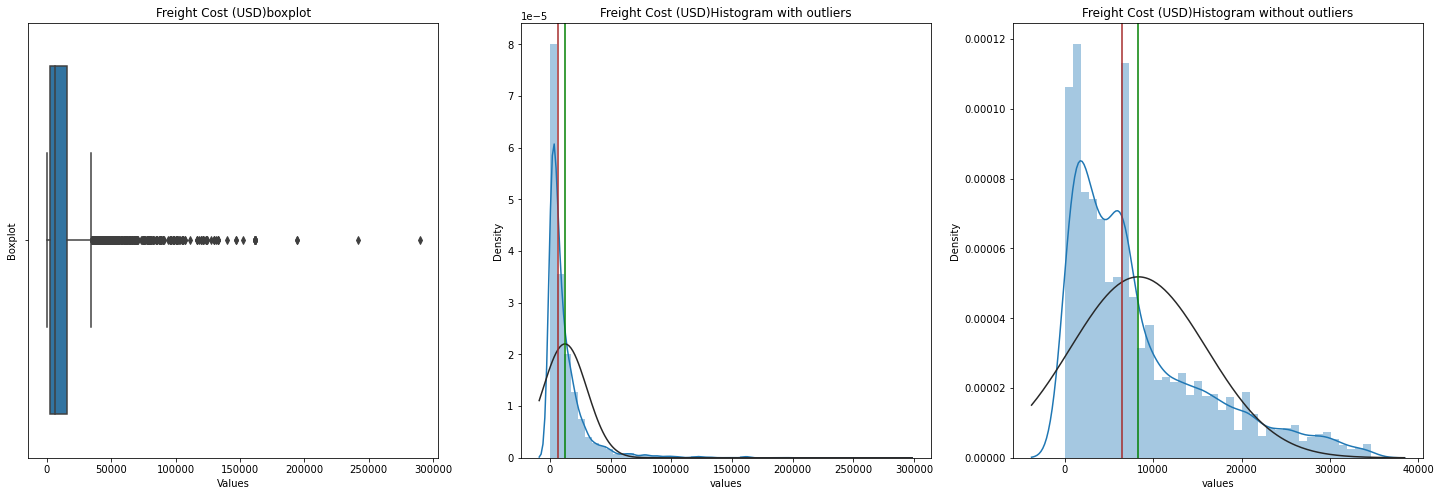

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Feature Line Item Insurance (USD) has outliers


Total no. of outliers in Line Item Insurance (USD) are 907 


Outlier percentage in Line Item Insurance (USD) is 10.0% 




,ID,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD),consignment_price
82,858,30,50000,45628.00,8.50,0.15,4093.0,9339.00,4939.20,2534278.20
110,1109,120,10240,420864.00,41.10,0.34,2523.0,14806.48,824.89,436495.37
116,1134,100,7500,45628.00,8.50,0.80,2215.0,16835.31,1176.00,618011.31
117,1140,100,6395,45628.00,8.50,0.80,1915.0,24514.33,1002.74,537117.07
118,1156,30,4399,386384.88,6.98,0.23,4482.0,6437.76,757.31,424546.93
...,...,...,...,...,...,...,...,...,...,...
10285,86772,30,4399,45628.00,4.61,0.15,1303.0,6437.76,1407.49,1440296.05
10303,86800,30,4399,45628.00,9.60,0.32,1303.0,19194.37,2259.84,1941454.21
10305,86802,60,4399,45628.00,7.72,0.13,1303.0,28277.42,2725.93,2347003.35
10315,86814,120,4399,45628.00,18.64,0.16,1303.0,26180.00,1341.33,1332321.33


C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


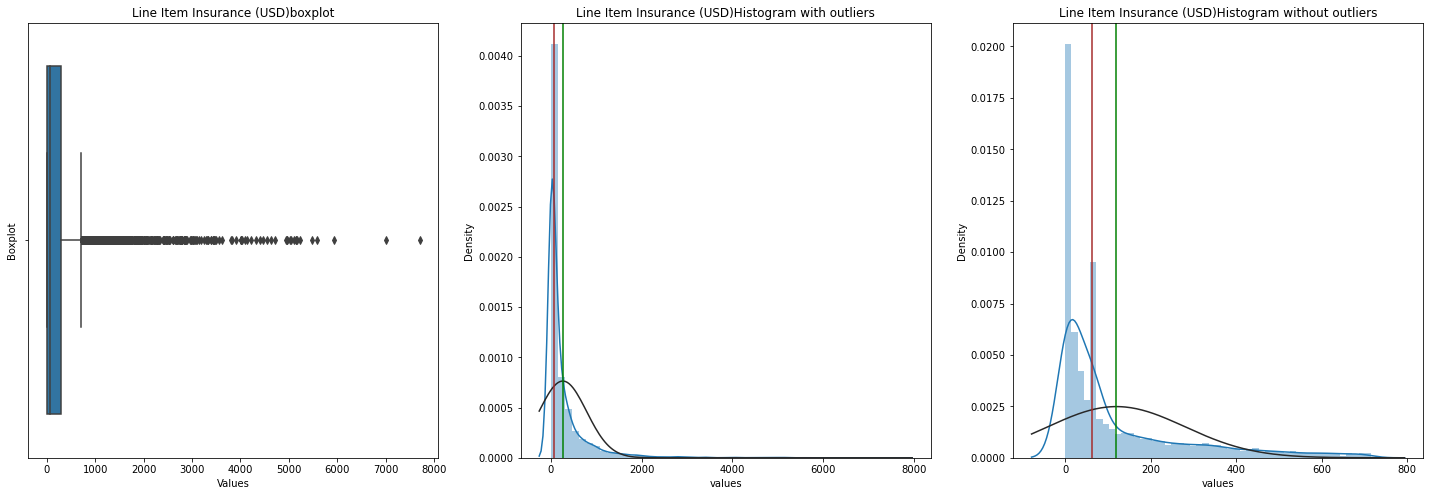

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Feature consignment_price has outliers


Total no. of outliers in consignment_price are 845 


Outlier percentage in consignment_price is 10.0% 




,ID,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD),consignment_price
82,858,30,50000,45628.0,8.50,0.15,4093.0,9339.00,63.74,2534278.20
116,1134,100,7500,45628.0,8.50,0.80,2215.0,16835.31,63.74,618011.31
117,1140,100,6395,45628.0,8.50,0.80,1915.0,24514.33,63.74,537117.07
139,1298,60,4399,45628.0,7.50,0.12,6813.0,31858.09,0.00,556858.09
140,1299,30,4399,45628.0,15.20,0.51,7416.0,6437.76,0.00,1152149.82
...,...,...,...,...,...,...,...,...,...,...
10303,86800,30,4399,45628.0,9.60,0.32,1303.0,19194.37,63.74,1941454.21
10305,86802,60,4399,45628.0,7.72,0.13,1303.0,28277.42,63.74,2347003.35
10315,86814,120,4399,45628.0,18.64,0.16,1303.0,26180.00,63.74,1332321.33
10318,86817,60,4399,45628.0,3.60,0.06,1303.0,6437.76,63.74,785856.01


C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


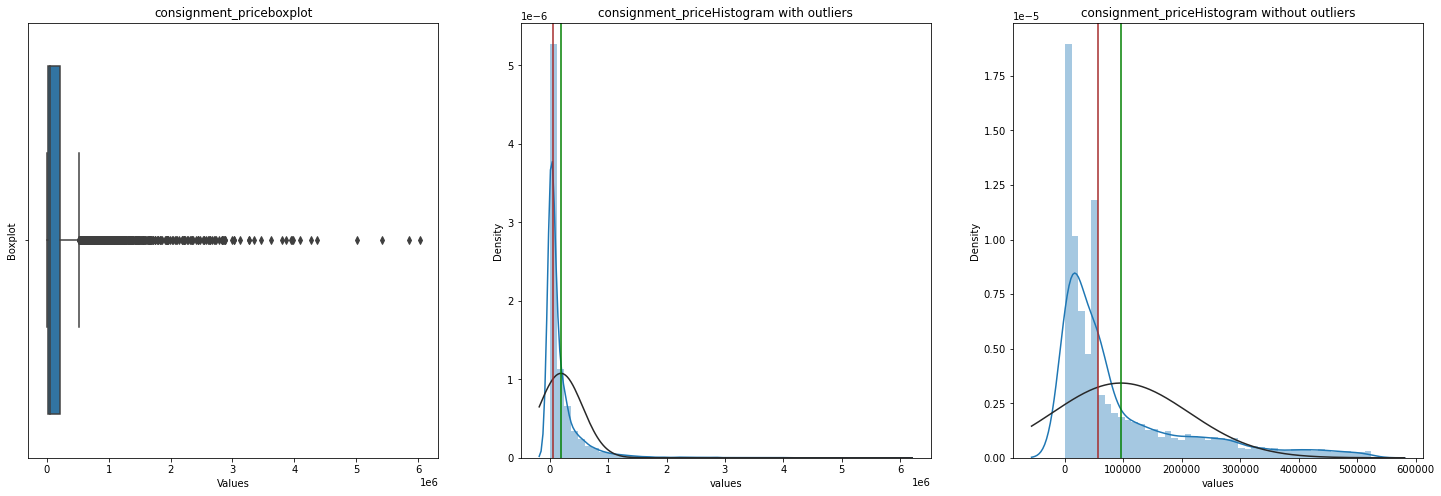

In [47]:
for col in df1:
  odt_plots(df1,col)


In [48]:
obj_cols=[x for x in df.columns if df[x].dtypes=="O"]

In [49]:
obj_cols

['Project Code',
 'PQ #',
 'PO / SO #',
 'ASN/DN #',
 'Country',
 'Managed By',
 'Fulfill Via',
 'Vendor INCO Term',
 'Shipment Mode',
 'PQ First Sent to Client Date',
 'PO Sent to Vendor Date',
 'Product Group',
 'Sub Classification',
 'Vendor',
 'Item Description',
 'Molecule/Test Type',
 'Brand',
 'Dosage',
 'Dosage Form',
 'Manufacturing Site',
 'First Line Designation']

In [50]:
dataset_table=pd.crosstab(df['Country'],df['Fulfill Via'])
print(dataset_table)

Fulfill Via         Direct Drop  From RDC
Country                                  
Afghanistan                   3         0
Angola                        4         3
Benin                         3         9
Botswana                     57         7
Burundi                      24        68
Cameroon                     48        18
Congo, DRC                  102       190
Côte d'Ivoire               245       811
Dominican Republic           20        25
Ethiopia                     86       118
Ghana                        33        15
Guatemala                     3         7
Guinea                        1         0
Guyana                       87       140
Haiti                       286       310
Kenya                        75        18
Lesotho                       2         0
Liberia                       6         0
Libya                         0         8
Malawi                       14         0
Mali                         14         0
Mozambique                   98   

In [51]:
dataset_table.values

array([[  3,   0],
       [  4,   3],
       [  3,   9],
       [ 57,   7],
       [ 24,  68],
       [ 48,  18],
       [102, 190],
       [245, 811],
       [ 20,  25],
       [ 86, 118],
       [ 33,  15],
       [  3,   7],
       [  1,   0],
       [ 87, 140],
       [286, 310],
       [ 75,  18],
       [  2,   0],
       [  6,   0],
       [  0,   8],
       [ 14,   0],
       [ 14,   0],
       [ 98, 484],
       [ 66,  24],
       [238, 912],
       [  5,   8],
       [224, 180],
       [  1,   1],
       [  1,   1],
       [288,   0],
       [ 84,  46],
       [ 42,   0],
       [ 16,  17],
       [210, 290],
       [  1,   1],
       [199, 559],
       [642,   1],
       [136, 529],
       [102, 423]], dtype=int64)

In [52]:
observes_values=dataset_table.values
print('Observed Values:-\n',observes_values)

Observed Values:-
 [[  3   0]
 [  4   3]
 [  3   9]
 [ 57   7]
 [ 24  68]
 [ 48  18]
 [102 190]
 [245 811]
 [ 20  25]
 [ 86 118]
 [ 33  15]
 [  3   7]
 [  1   0]
 [ 87 140]
 [286 310]
 [ 75  18]
 [  2   0]
 [  6   0]
 [  0   8]
 [ 14   0]
 [ 14   0]
 [ 98 484]
 [ 66  24]
 [238 912]
 [  5   8]
 [224 180]
 [  1   1]
 [  1   1]
 [288   0]
 [ 84  46]
 [ 42   0]
 [ 16  17]
 [210 290]
 [  1   1]
 [199 559]
 [642   1]
 [136 529]
 [102 423]]


In [53]:
val=stats.chi2_contingency(dataset_table)

In [54]:
val

(2533.855537580601,
 0.0,
 37,
 array([[1.19668546e+00, 1.80331454e+00],
        [2.79226608e+00, 4.20773392e+00],
        [4.78674186e+00, 7.21325814e+00],
        [2.55292899e+01, 3.84707101e+01],
        [3.66983542e+01, 5.53016458e+01],
        [2.63270802e+01, 3.96729198e+01],
        [1.16477385e+02, 1.75522615e+02],
        [4.21233283e+02, 6.34766717e+02],
        [1.79502820e+01, 2.70497180e+01],
        [8.13746116e+01, 1.22625388e+02],
        [1.91469674e+01, 2.88530326e+01],
        [3.98895155e+00, 6.01104845e+00],
        [3.98895155e-01, 6.01104845e-01],
        [9.05492001e+01, 1.36450800e+02],
        [2.37741512e+02, 3.58258488e+02],
        [3.70972494e+01, 5.59027506e+01],
        [7.97790310e-01, 1.20220969e+00],
        [2.39337093e+00, 3.60662907e+00],
        [3.19116124e+00, 4.80883876e+00],
        [5.58453217e+00, 8.41546783e+00],
        [5.58453217e+00, 8.41546783e+00],
        [2.32156980e+02, 3.49843020e+02],
        [3.59005639e+01, 5.40994361e+01],
   

In [55]:
# from scipy.stats import chi2

# crit_val = chi2.ppf(0.95, df['Country'])

# if chi2_stat > crit_val:
#     print("Reject null hypothesis: There is a significant difference between the observed and expected frequencies.")
# else:
#     print("Failed to reject null hypothesis: There is no significant difference between the observed and expected frequencies.")


In [56]:
# import scipy.stats as stats



# # Create a contingency table from the dataframe
# contingency_table = pd.crosstab(df['Loan_Status'], df['Married'])

# # Perform the chi-square test
# chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

# # Print the results
# print(f"Chi-square statistic: {chi2}")
# print(f"P-value: {p_value}")
# print(f"Degrees of freedom: {dof}")
# print("Expected frequencies:")
# print(expected)

# Visulization

Shipment Mode

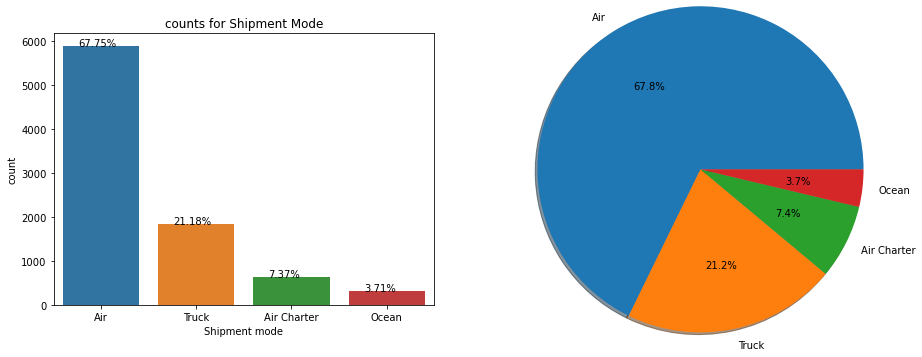

In [57]:
fig=plt.figure(figsize=(15,5))
ax=fig.add_subplot(121)


ax=sns.countplot(x='Shipment Mode',data=df)
total = df.shape[0]
for p in ax.patches:
    percentage = '{:.2f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width()/5
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y))
plt.title("counts for Shipment Mode")
plt.xlabel('Shipment mode')

ax=fig.add_subplot(122)
lbs=['Air','Truck','Air Charter','Ocean']
plt.pie(df['Shipment Mode'].value_counts(),labels=lbs,autopct='%1.1f%%',shadow=True,radius=1.5)
plt.show()


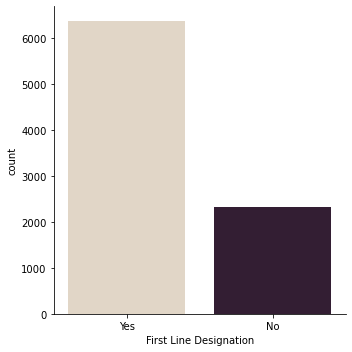

In [58]:
ax=sns.catplot(data=df, x="First Line Designation", kind="count", palette="ch:.25")

In [59]:
import matplotlib.pyplot as plt


In [60]:
def barplot(data,cols):
    plt.figure(figsize=(25,10))
    data.value_counts().plot.bar()
    plt.title("barplot for {}".format(cols))
    plt.show()

In [61]:
df.columns

Index(['ID', 'Project Code', 'PQ #', 'PO / SO #', 'ASN/DN #', 'Country',
       'Managed By', 'Fulfill Via', 'Vendor INCO Term', 'Shipment Mode',
       'PQ First Sent to Client Date', 'PO Sent to Vendor Date',
       'Scheduled Delivery Date', 'Delivered to Client Date',
       'Delivery Recorded Date', 'Product Group', 'Sub Classification',
       'Vendor', 'Item Description', 'Molecule/Test Type', 'Brand', 'Dosage',
       'Dosage Form', 'Unit of Measure (Per Pack)', 'Line Item Quantity',
       'Line Item Value', 'Pack Price', 'Unit Price', 'Manufacturing Site',
       'First Line Designation', 'Weight (Kilograms)', 'Freight Cost (USD)',
       'Line Item Insurance (USD)', 'consignment_price'],
      dtype='object')

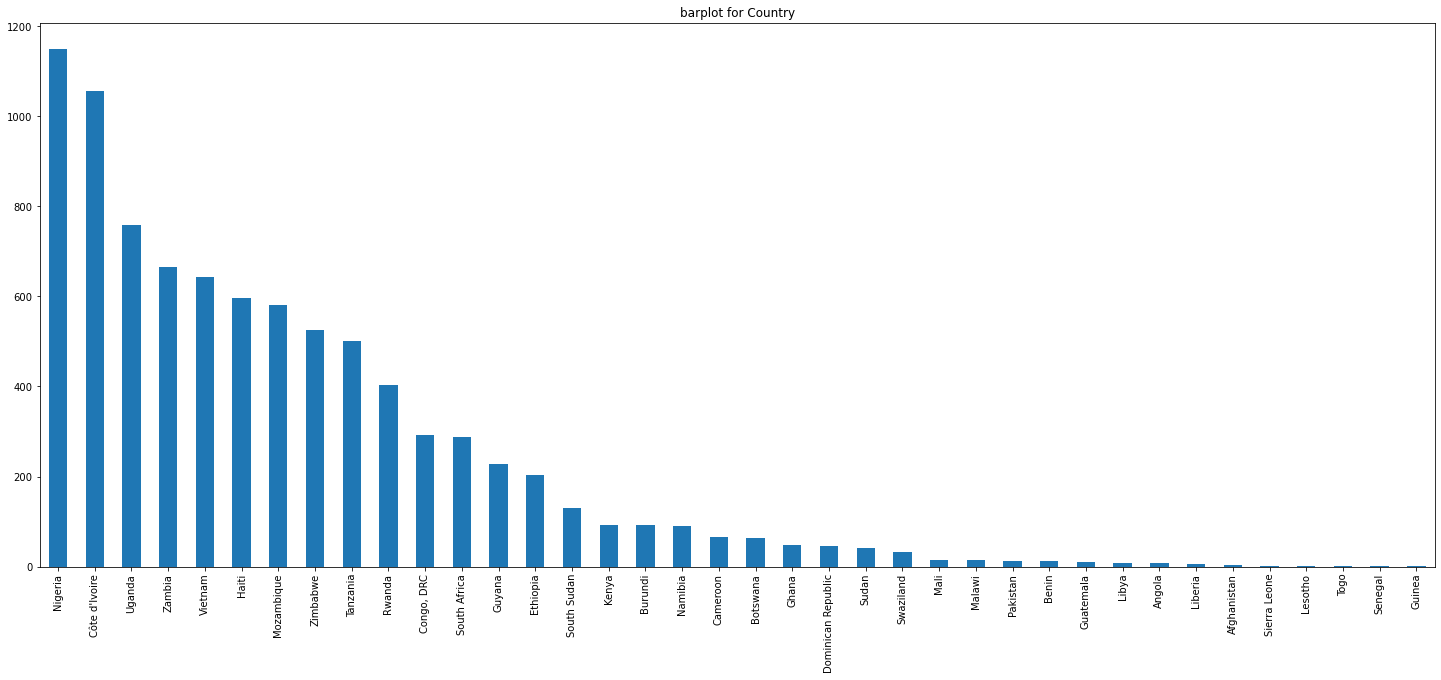

In [62]:
barplot(df['Country'],"Country")

In [63]:
# plt.figure(figsize=(15,10))
# itemcount=df['Country'].value_counts().nlargest(20)
# print("Top 20 Countries Wise Count \n")
# print(itemcount)
# ax=sns.countplot(df['Country'],order=df['Country'].value_counts().nlargest(10).index)

# total = df.shape[0]
# for p in ax.patches:
#     percentage = '{:.2f}%'.format(100 * p.get_height() / total)
#     x = p.get_x() + p.get_width()/5
#     y = p.get_y() + p.get_height()
#     ax.annotate(percentage, (x, y))
  
# plt.show()

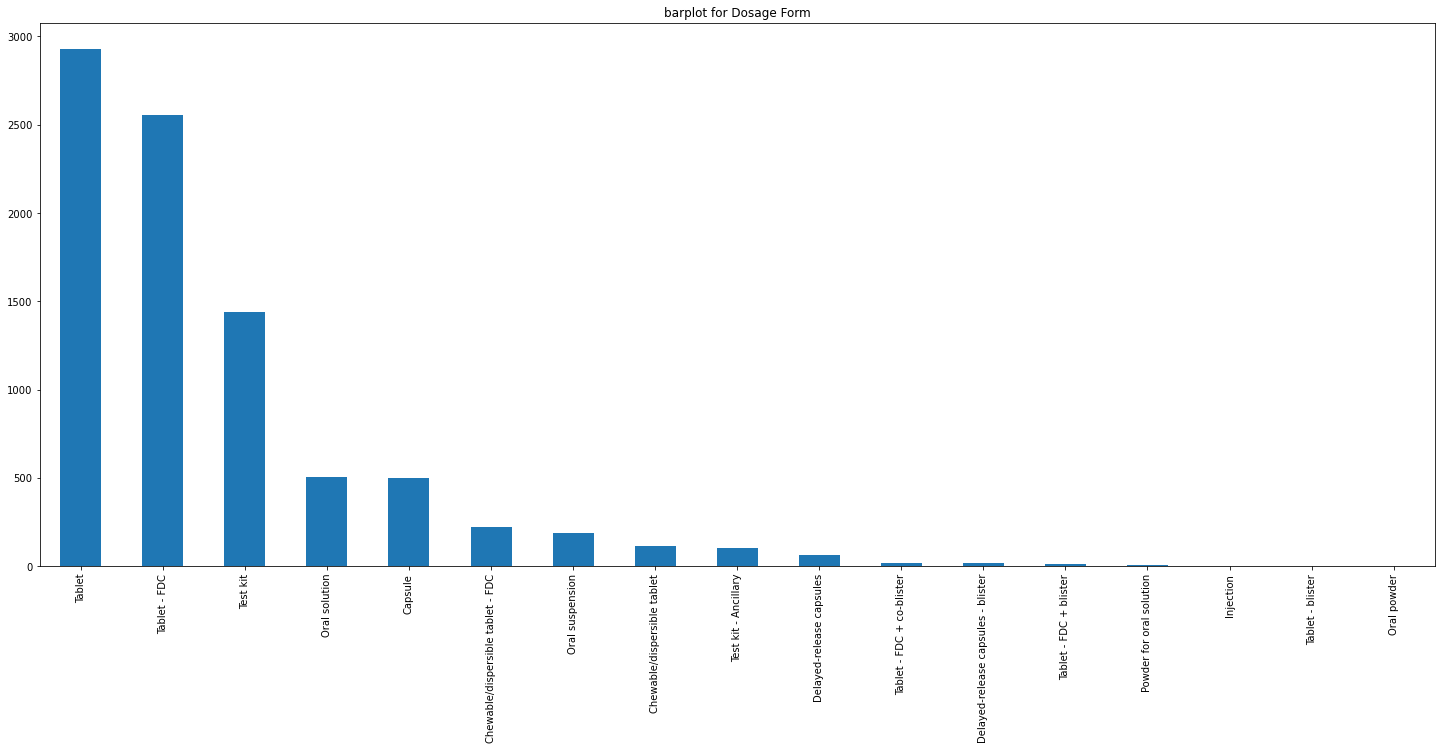

In [64]:
barplot(df["Dosage Form"],"Dosage Form")

In [65]:
# plt.figure(figsize=(25,15))
# itemcount=df["Dosage Form"].value_counts().nlargest(10)
# print("Top 20 Dosage Form Count \n")
# print(itemcount)
# ax=sns.countplot(df["Dosage Form"],order=df["Dosage Form"].value_counts().nlargest(10).index)

# total = df.shape[0]
# for p in ax.patches:
#     percentage = '{:.2f}%'.format(100 * p.get_height() / total)
#     x = p.get_x() + p.get_width()/5
#     y = p.get_y() + p.get_height()
#     ax.annotate(percentage, (x, y))
  
# plt.show()

Product Group

In [66]:
df["Product Group"].value_counts()

ARV     7107
HRDT    1538
ANTM      22
ACT       16
MRDT       6
Name: Product Group, dtype: int64

In [67]:
# plt.figure(figsize=(25,15))
# itemcount=df["Product Group"].value_counts()
# print("Product Group Count \n")
# print(itemcount)
# ax=sns.countplot(df["Product Group"],order=df["Product Group"].value_counts().index)

# total = df.shape[0]
# for p in ax.patches:
#     percentage = '{:.2f}%'.format(100 * p.get_height() / total)
#     x = p.get_x() + p.get_width()/5
#     y = p.get_y() + p.get_height()
#     ax.annotate(percentage, (x, y))
  
# plt.show()

code for barplot and Pie plot

In [68]:
# def plot(data,col_name):
#     fig=plt.figure(figsize=(25,10))
#     ax0=fig.add_subplot(121)
#     data.value_counts().plot.bar()
#     plt.title("bar plot for {} column".format(col_name))
    
#     ax1=fig.add_subplot(122)
#     lbs=data
#     data.value_counts().plot.pie(labels=lbs,autopct='1.1f%%',shadow=True,radius=1.5)
#     plt.title("pie chart for {} column".format(col_name))
    

In [69]:
# plot(df["Product Group"],"productgroup")

In [70]:
# # Instantiate a figure of size of 15 x 7 inches
# fig = plt.figure(figsize=(10, 7),dpi =100)


# ax = sns.countplot(x='Sub Classification',  data=df, palette='Dark2')

# # Adding percentages to the bars
# total = df.shape[0]
# for p in ax.patches:
#     percentage = '{:.2f}%'.format(100 * p.get_height() / total)
#     x = p.get_x() + p.get_width()/5
#     y = p.get_y() + p.get_height()
#     ax.annotate(percentage, (x, y))
    
# # Adding some cosmetics - ticks, labels, title, legend and grid.
# plt.xticks(rotation=0, size=10)
# plt.yticks(fontsize=12)
# plt.xlabel(xlabel="Sub Classification", size=14,)
# plt.ylabel(ylabel='Count', size=14)
# plt.grid(b=True)

# # Display the figure
# plt.show()

In [71]:
# Instantiate a figure of size of 15 x 7 inches
# fig = plt.figure(figsize=(10, 7),dpi =100)


# ax = sns.countplot(x='Sub Classification',  data=df, palette='Dark2')

# # Adding percentages to the bars
# total = df.shape[0]
# for p in ax.patches:
#     percentage = '{:.2f}%'.format(100 * p.get_height() / total)
#     x = p.get_x() + p.get_width()/5
#     y = p.get_y() + p.get_height()
#     ax.annotate(percentage, (x, y))
    
# # Adding some cosmetics - ticks, labels, title, legend and grid.
# plt.xticks(rotation=0, size=10)
# plt.yticks(fontsize=12)
# plt.xlabel(xlabel="Sub Classification", size=14,)
# plt.ylabel(ylabel='Count', size=14)
# plt.grid(b=True)

# # Display the figure
# plt.show()

In [72]:
# df.columns

In [73]:
object_data_columns=[]
for i in df.columns:
  if df[i].dtypes=='object':
    object_data_columns.append(i)
object_data_columns

['Project Code',
 'PQ #',
 'PO / SO #',
 'ASN/DN #',
 'Country',
 'Managed By',
 'Fulfill Via',
 'Vendor INCO Term',
 'Shipment Mode',
 'PQ First Sent to Client Date',
 'PO Sent to Vendor Date',
 'Product Group',
 'Sub Classification',
 'Vendor',
 'Item Description',
 'Molecule/Test Type',
 'Brand',
 'Dosage',
 'Dosage Form',
 'Manufacturing Site',
 'First Line Designation']

In [74]:
from scipy.stats import f_oneway

In [75]:
# for i in object_data_columns:
#   categoryGroup=df.groupby(i)['consignment_price'].apply(list)
#   AnnovaResult=f_oneway(*categoryGroup,axis=0)
#   print(f"{i} --P-Value for Anova is {AnnovaResult[1]}")

In [76]:
df11=df.copy()

In [77]:
th1 = 254
counts = df11['Project Code'].value_counts()

repl = counts[counts<=th1].index
df11['Project Code']=(df11['Project Code'].replace(repl,'uncommon'))

In [78]:
df11['Project Code'].value_counts()

uncommon      3331
104-CI-T30     720
151-NG-T30     604
114-UG-T30     575
108-VN-T30     483
106-HT-T30     405
111-MZ-T30     398
110-ZM-T30     397
109-TZ-T30     357
107-RW-T30     316
104-CI-T01     296
161-ZA-T30     278
101-CD-T30     267
113-ZW-T30     262
Name: Project Code, dtype: int64

In [79]:
th1 = 2212
counts = df11['PQ #'].value_counts()
repl = counts[counts<=th1].index
df11['PQ #']=(df11['PQ #'].replace(repl,'uncommon'))

In [80]:
th1 = 5
counts = df11['PO / SO #'].value_counts()
repl = counts[counts<=th1].index
df11['PO / SO #']=(df11['PO / SO #'].replace(repl,'uncommon'))

In [81]:
th1 = 5
counts = df11['ASN/DN #'].value_counts()
repl = counts[counts<=th1].index
df11['ASN/DN #']=(df11['ASN/DN #'].replace(repl,'uncommon'))

In [82]:
th1 = 130
counts = df11['Country'].value_counts()
repl = counts[counts<=th1].index
df11['Country']=(df11['Country'].replace(repl,'uncommon'))

In [83]:
th1 = 303
counts = df11['Vendor INCO Term'].value_counts()
repl = counts[counts<=th1].index
df11['Vendor INCO Term']=(df11['Vendor INCO Term'].replace(repl,'uncommon'))

In [84]:
th1 = 1537
counts = df11['Product Group'].value_counts()
repl = counts[counts<=th1].index
df11['Product Group']=(df11['Product Group'].replace(repl,'uncommon'))

In [85]:
th1 = 1433
counts = df11['Sub Classification'].value_counts()
repl = counts[counts<=th1].index
df11['Sub Classification']=(df11['Sub Classification'].replace(repl,'uncommon'))

In [86]:
th1 = 157
counts = df11['Vendor'].value_counts()
repl = counts[counts<=th1].index
df11['Vendor']=(df11['Vendor'].replace(repl,'uncommon'))

In [87]:
th1 = 504
counts = df11['Dosage Form'].value_counts()
repl = counts[counts<=th1].index
df11['Dosage Form']=(df11['Dosage Form'].replace(repl,'uncommon'))

In [88]:
# th1 = 139
# counts = df11['Manufacturing Site'].value_counts()
# repl = counts[counts<=th1].index
# df11['Manufacturing Site']=(df11['Manufacturing Site'].replace(repl,'uncommon'))

In [89]:
th1 = 101
counts = df11['Brand'].value_counts()
repl = counts[counts<=th1].index
df11['Brand']=(df11['Brand'].replace(repl,'uncommon'))

In [90]:
# for i in object_data_columns:
#     print(i)
#     print(df11[i].value_counts())
#     print()
#     print('-----------------------------------------------------')

In [91]:
df2 = df11.copy()

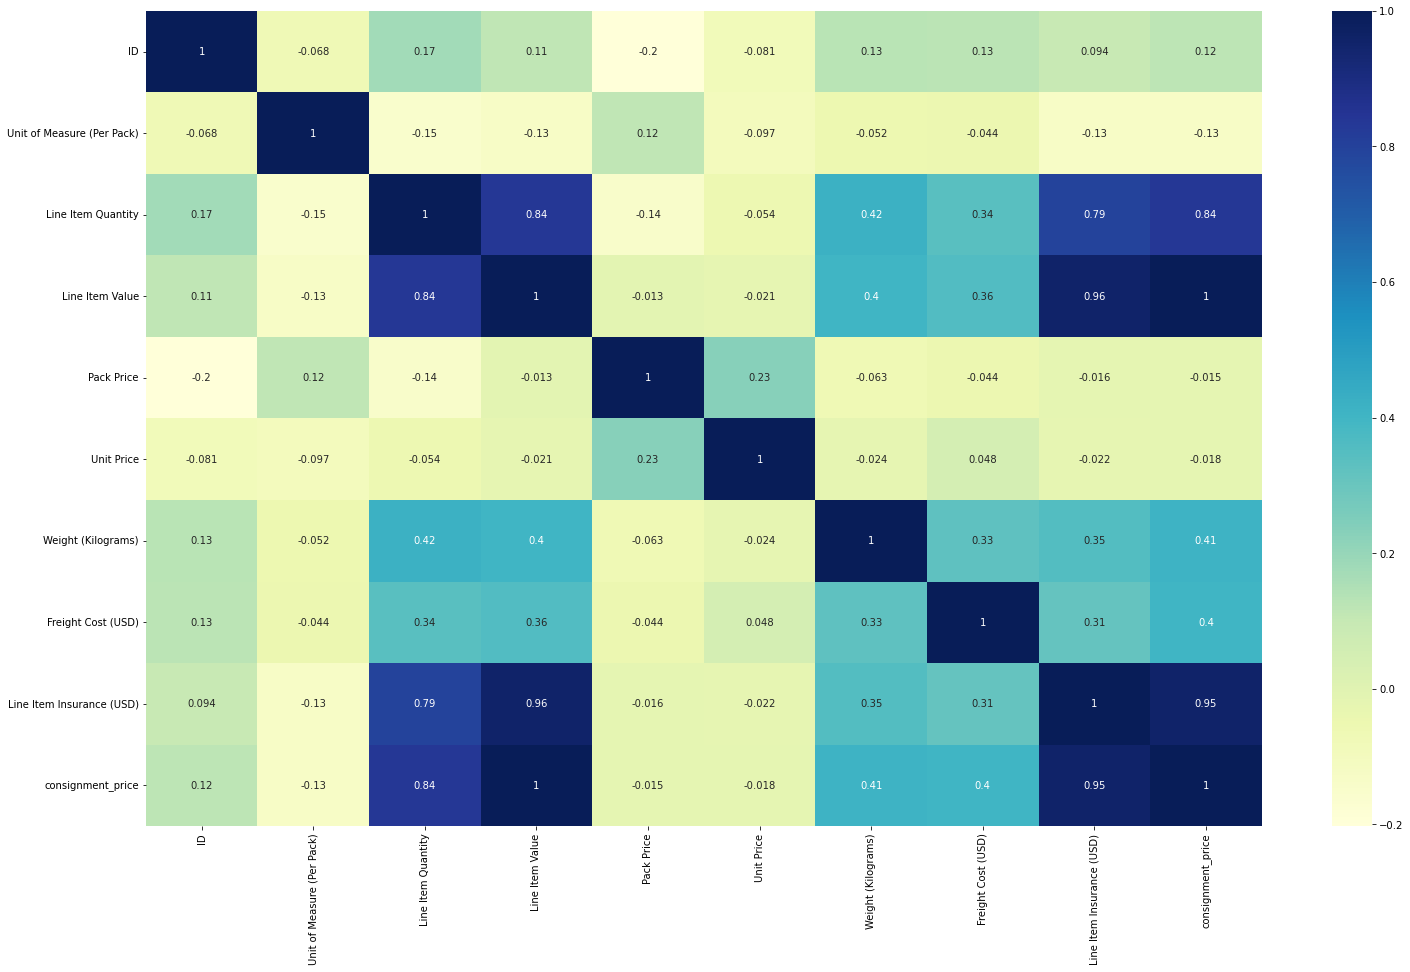

In [92]:
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(25,15))
cor = df2.corr()
sns.heatmap(cor, annot=True,cmap="YlGnBu")
plt.show()

In [93]:
df2.columns

Index(['ID', 'Project Code', 'PQ #', 'PO / SO #', 'ASN/DN #', 'Country',
       'Managed By', 'Fulfill Via', 'Vendor INCO Term', 'Shipment Mode',
       'PQ First Sent to Client Date', 'PO Sent to Vendor Date',
       'Scheduled Delivery Date', 'Delivered to Client Date',
       'Delivery Recorded Date', 'Product Group', 'Sub Classification',
       'Vendor', 'Item Description', 'Molecule/Test Type', 'Brand', 'Dosage',
       'Dosage Form', 'Unit of Measure (Per Pack)', 'Line Item Quantity',
       'Line Item Value', 'Pack Price', 'Unit Price', 'Manufacturing Site',
       'First Line Designation', 'Weight (Kilograms)', 'Freight Cost (USD)',
       'Line Item Insurance (USD)', 'consignment_price'],
      dtype='object')

In [94]:
th1 = 52
counts = df2['Manufacturing Site'].value_counts()
repl = counts[counts<=th1].index
df2['Manufacturing Site']=(df2['Manufacturing Site'].replace(repl,'uncommon'))

In [95]:
df2['Manufacturing Site'].value_counts()

Aurobindo Unit III, India                2601
Mylan (formerly Matrix) Nashik           1346
Hetero Unit III Hyderabad IN              784
uncommon                                  731
Cipla, Goa, India                         584
Strides, Bangalore, India.                519
Alere Medical Co., Ltd.                   408
Trinity Biotech, Plc                      381
ABBVIE Ludwigshafen Germany               308
Inverness Japan                           301
ABBVIE (Abbott) Logis. UK                 139
Chembio Diagnostics Sys. Inc.             118
Standard Diagnostics, Korea               107
Aurobindo Unit VII, IN                    107
Aspen-OSD, Port Elizabeth, SA             103
MSD, Haarlem, NL                           82
KHB Test Kit Facility, Shanghai China      70
Name: Manufacturing Site, dtype: int64

In [96]:
df2['Manufacturing Site'].unique()

array(['uncommon', 'Aurobindo Unit III, India',
       'ABBVIE Ludwigshafen Germany', 'Trinity Biotech, Plc',
       'Cipla, Goa, India', 'Chembio Diagnostics Sys. Inc.',
       'Inverness Japan', 'Standard Diagnostics, Korea',
       'Mylan (formerly Matrix) Nashik', 'MSD, Haarlem, NL',
       'ABBVIE (Abbott) Logis. UK', 'Hetero Unit III Hyderabad IN',
       'Strides, Bangalore, India.', 'Aspen-OSD, Port Elizabeth, SA',
       'KHB Test Kit Facility, Shanghai China', 'Alere Medical Co., Ltd.',
       'Aurobindo Unit VII, IN'], dtype=object)

In [97]:
def country_source(col):
    s=col.split(" ")
    return s[-1]

In [98]:
df2['Manufacturing Site'] = df2['Manufacturing Site'].apply(country_source)

In [99]:
df2['Manufacturing Site'].value_counts()


India       3185
Nashik      1346
IN           891
uncommon     731
India.       519
Ltd.         408
Plc          381
Germany      308
Japan        301
UK           139
Inc.         118
Korea        107
SA           103
NL            82
China         70
Name: Manufacturing Site, dtype: int64

In [100]:
df2= df2.replace({'Manufacturing Site':{'IN':'India','India.':'India','Nashik':'India','Ltd.':'Japan','Plc':'Ireland','UK':'United Kingdom','Inc.':'USA','IT':'Italy','(Canada)':'Canada','NL':'Nether Lands','SA':'South Africa'}})

In [101]:
df2['Manufacturing Site'].value_counts()

India             5941
uncommon           731
Japan              709
Ireland            381
Germany            308
United Kingdom     139
USA                118
Korea              107
South Africa       103
Nether Lands        82
China               70
Name: Manufacturing Site, dtype: int64

In [102]:
df2.sample()

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD),consignment_price
1986,11920,uncommon,uncommon,SO,DN,Rwanda,PMO - US,From RDC,N/A - From RDC,Truck,...,4703,15049.6,3.2,0.05,India,Yes,455.0,3754.14,29.5,18833.24


In [103]:
from sklearn.preprocessing import LabelEncoder
lr=LabelEncoder()

In [104]:
# df2=df2.join(Manufacture_site)

In [105]:
# df2 = df2.rename(columns={0: 'Manufacture_site'})


In [106]:
df2['Manufacturing Site']=lr.fit_transform(df2['Manufacturing Site'])

In [107]:
df2.head()

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD),consignment_price
0,1,uncommon,uncommon,SCMS,ASN,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,...,19,551.0,29.00,0.97,10,Yes,13.0,780.34,0.0,1331.34
1,3,uncommon,uncommon,SCMS,ASN,Vietnam,PMO - US,Direct Drop,EXW,Air,...,1000,6200.0,6.20,0.03,2,Yes,358.0,4521.50,0.0,10721.50
2,4,uncommon,uncommon,SCMS,ASN,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,...,500,40000.0,80.00,0.80,10,Yes,171.0,1653.78,0.0,41653.78
3,15,uncommon,uncommon,SCMS,ASN,Vietnam,PMO - US,Direct Drop,EXW,Air,...,31920,127360.8,3.99,0.07,10,Yes,1855.0,16007.06,0.0,143367.86
4,16,uncommon,uncommon,SCMS,ASN,Vietnam,PMO - US,Direct Drop,EXW,Air,...,38000,121600.0,3.20,0.05,2,Yes,7590.0,45450.08,0.0,167050.08


In [108]:
df2['Manufacturing Site'].value_counts()

2     5941
10     731
4      709
3      381
1      308
9      139
8      118
5      107
7      103
6       82
0       70
Name: Manufacturing Site, dtype: int64

In [109]:
df2['Country'].value_counts()

Nigeria          1150
Côte d'Ivoire    1056
uncommon          799
Uganda            758
Zambia            665
Vietnam           643
Haiti             596
Mozambique        582
Zimbabwe          525
Tanzania          500
Rwanda            404
Congo, DRC        292
South Africa      288
Guyana            227
Ethiopia          204
Name: Country, dtype: int64

In [110]:
df2['Managed By'].value_counts()

PMO - US              8688
Haiti Field Office       1
Name: Managed By, dtype: int64

In [111]:
df2['Managed By'].value_counts()

PMO - US              8688
Haiti Field Office       1
Name: Managed By, dtype: int64

In [112]:
df2['Fulfill Via'].value_counts()

From RDC       5223
Direct Drop    3466
Name: Fulfill Via, dtype: int64

In [113]:
df2['Vendor INCO Term'].value_counts()

N/A - From RDC    5223
EXW               2586
uncommon           510
FCA                370
Name: Vendor INCO Term, dtype: int64

In [114]:
df2['Vendor INCO Term'].value_counts()

N/A - From RDC    5223
EXW               2586
uncommon           510
FCA                370
Name: Vendor INCO Term, dtype: int64

In [115]:
df2['Shipment Mode'].value_counts()

Air            5887
Truck          1840
Air Charter     640
Ocean           322
Name: Shipment Mode, dtype: int64

In [116]:
df2['Shipment Mode'].value_counts()

Air            5887
Truck          1840
Air Charter     640
Ocean           322
Name: Shipment Mode, dtype: int64

In [117]:
df2['Product Group'].value_counts()

ARV         7107
HRDT        1538
uncommon      44
Name: Product Group, dtype: int64

In [118]:
df2.Country=lr.fit_transform(df2.Country)
df2['Shipment Mode']=lr.fit_transform(df2['Shipment Mode'])
df2['Vendor INCO Term']=lr.fit_transform(df2['Vendor INCO Term'])


In [119]:
df2["Country"].value_counts()

6     1150
1     1056
14     799
10     758
12     665
11     643
4      596
5      582
13     525
9      500
7      404
0      292
8      288
3      227
2      204
Name: Country, dtype: int64

In [120]:
df2 = pd.get_dummies(df2,columns=['Fulfill Via','Managed By','Product Group','First Line Designation'],drop_first=True)

In [121]:
df2.sample()

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Vendor INCO Term,Shipment Mode,PQ First Sent to Client Date,PO Sent to Vendor Date,...,Manufacturing Site,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD),consignment_price,Fulfill Via_From RDC,Managed By_PMO - US,Product Group_HRDT,Product Group_uncommon,First Line Designation_Yes
5940,70991,161-ZA-T30,uncommon,SCMS,ASN,8,3,2,2011-03-10 00:00:00,3/23/11,...,2,7878.0,8134.37,718.86,444528.23,0,1,0,0,1


In [122]:
df2.drop(labels=['ID','PQ #', 'PO / SO #', 'ASN/DN #','PQ First Sent to Client Date', 'PO Sent to Vendor Date','Scheduled Delivery Date', 'Delivered to Client Date',
       'Delivery Recorded Date', 'Item Description', 'Molecule/Test Type','Unit of Measure (Per Pack)', 'Line Item Value',
       'Freight Cost (USD)','Line Item Insurance (USD)','Dosage','Project Code','Dosage Form','Brand','Vendor','Sub Classification'],axis=1,inplace=True)

In [123]:
df3=df2.copy()

In [124]:
df2['Fulfill Via_From RDC'].value_counts()

1    5223
0    3466
Name: Fulfill Via_From RDC, dtype: int64

In [125]:
df3.sample()

,Country,Vendor INCO Term,Shipment Mode,Line Item Quantity,Pack Price,Unit Price,Manufacturing Site,Weight (Kilograms),consignment_price,Fulfill Via_From RDC,Managed By_PMO - US,Product Group_HRDT,Product Group_uncommon,First Line Designation_Yes
7155,14,2,0,29998,8.26,0.14,2,3274.0,270074.03,1,1,0,0,1


In [126]:
df3['Managed By_PMO - US'].value_counts()

1    8688
0       1
Name: Managed By_PMO - US, dtype: int64

In [127]:
obj_cols=[x for x in df3.columns if df3[x].dtypes=="O"]

In [128]:
obj_cols

[]

In [129]:
from sklearn.preprocessing import MinMaxScaler
X = df3.drop('consignment_price',axis=1)
y = df3['consignment_price']

features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features
X.head()

,Country,Vendor INCO Term,Shipment Mode,Line Item Quantity,Pack Price,Unit Price,Manufacturing Site,Weight (Kilograms),Fulfill Via_From RDC,Managed By_PMO - US,Product Group_HRDT,Product Group_uncommon,First Line Designation_Yes
0,0.071429,0.000000,0.0,0.000029,0.023200,0.004065,1.0,0.000015,0.0,1.0,1.0,0.0,1.0
1,0.785714,0.000000,0.0,0.001611,0.004960,0.000126,0.2,0.000418,0.0,1.0,0.0,0.0,1.0
2,0.071429,0.333333,0.0,0.000805,0.064000,0.003352,1.0,0.000199,0.0,1.0,1.0,0.0,1.0
3,0.785714,0.000000,0.0,0.051482,0.003192,0.000293,1.0,0.002164,0.0,1.0,0.0,0.0,1.0
4,0.785714,0.000000,0.0,0.061289,0.002560,0.000210,0.2,0.008853,0.0,1.0,0.0,0.0,1.0


In [130]:
X

,Country,Vendor INCO Term,Shipment Mode,Line Item Quantity,Pack Price,Unit Price,Manufacturing Site,Weight (Kilograms),Fulfill Via_From RDC,Managed By_PMO - US,Product Group_HRDT,Product Group_uncommon,First Line Designation_Yes
0,0.071429,0.000000,0.0,0.000029,0.023200,0.004065,1.0,0.000015,0.0,1.0,1.0,0.0,1.0
1,0.785714,0.000000,0.0,0.001611,0.004960,0.000126,0.2,0.000418,0.0,1.0,0.0,0.0,1.0
2,0.071429,0.333333,0.0,0.000805,0.064000,0.003352,1.0,0.000199,0.0,1.0,1.0,0.0,1.0
3,0.785714,0.000000,0.0,0.051482,0.003192,0.000293,1.0,0.002164,0.0,1.0,0.0,0.0,1.0
4,0.785714,0.000000,0.0,0.061289,0.002560,0.000210,0.2,0.008853,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8684,0.428571,0.666667,0.0,0.010844,0.002496,0.000419,0.2,0.007212,1.0,1.0,0.0,0.0,0.0
8685,0.928571,0.666667,1.0,0.331037,0.002880,0.000251,0.2,0.030186,1.0,1.0,0.0,0.0,0.0
8686,0.928571,0.666667,1.0,0.268662,0.002880,0.000251,1.0,0.030186,1.0,1.0,0.0,0.0,0.0
8687,0.071429,0.666667,1.0,0.033986,0.005216,0.000461,0.2,0.005162,1.0,1.0,0.0,0.0,0.0


In [131]:
from sklearn.model_selection import train_test_split

In [132]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [133]:
x_train 

,Country,Vendor INCO Term,Shipment Mode,Line Item Quantity,Pack Price,Unit Price,Manufacturing Site,Weight (Kilograms),Fulfill Via_From RDC,Managed By_PMO - US,Product Group_HRDT,Product Group_uncommon,First Line Designation_Yes
8175,0.428571,0.666667,0.333333,0.016745,0.001520,0.000126,0.2,0.000895,1.0,1.0,0.0,0.0,1.0
7707,0.500000,0.666667,1.000000,0.022019,0.003672,0.000629,1.0,0.005046,1.0,1.0,0.0,0.0,0.0
899,0.928571,0.666667,0.000000,0.060063,0.005920,0.000503,0.2,0.002938,1.0,1.0,0.0,0.0,0.0
6227,0.428571,0.666667,0.333333,0.058692,0.002664,0.000461,0.2,0.020359,1.0,1.0,0.0,0.0,1.0
252,1.000000,0.000000,0.000000,0.012095,0.064000,0.003352,0.4,0.002584,0.0,1.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4373,0.071429,0.333333,0.000000,0.045160,0.024656,0.001089,0.1,0.008194,0.0,1.0,0.0,0.0,1.0
7891,0.714286,0.666667,1.000000,0.008063,0.006584,0.001131,0.2,0.000708,1.0,1.0,0.0,0.0,1.0
4859,0.500000,1.000000,0.000000,0.016692,0.002072,0.000168,0.2,0.000679,0.0,1.0,0.0,0.0,1.0
3264,0.285714,0.000000,0.000000,0.003713,0.001000,0.000168,0.2,0.000167,0.0,1.0,0.0,0.0,1.0


Corelations

In [134]:
# import pandas as pd
# from sklearn.feature_selection import VarianceThreshold

In [135]:
# var_thres=VarianceThreshold(threshold=0)
# var_thres.fit(x_train)

In [136]:
# import seaborn as sns
# #Using Pearson Correlation
# plt.figure(figsize=(30,20))
# cor = x_train.corr()
# sns.heatmap(cor, annot=True,cmap="YlGnBu")
# plt.show()

In [137]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [138]:
corr_features = correlation(x_train, 0.0)
len(set(corr_features))

12

In [139]:
corr_features = correlation(x_train, 0.7)
len(set(corr_features))

1

In [140]:
# lin_model=LinearRegression()
# lin_model.fit(x_train,y_train)
# lin_model_train_pred=lin_model.predict(x_train)
# lin_model_test_pred=lin_model.predict(x_test)

In [141]:

# print('lin_model_train_pred',lin_model_train_pred)
# print('lin_model_train_pred',lin_model_train_pred)

In [142]:
# print("r squared for train model:",lin_model.score(x_train,y_train),"r squared for test model:",lin_model.score(x_test,y_test))

In [143]:
def adjusted_r2(data,true,pred):
  r2=r2_score(true,pred)
  n=data.shape[0]
  p=data.shape[1]
  adj_r2=1-(1-r2)*(n-1)/(n-p*1)
  return adj_r2

In [144]:
def accuracy_metrics(test,pred,type_):
  r2=r2_score(test,pred)
  rmse=np.sqrt(mean_squared_error(test,pred))
  if r2:
    print("The r2 score for {} is {}%".format(type_,(r2*100)))
    print("RMSE score for {} is {}".format(type_,(rmse)))
  return None


In [145]:
# accuracy_metrics(y_train,lin_model_train_pred,"train")

In [146]:
# accuracy_metrics(y_test,lin_model_test_pred,"test")

In [147]:
def rmse(y_true,y_pred):
    rmse = np.sqrt(mean_squared_error(y_true,y_pred))
    return rmse

In [148]:
# results = pd.DataFrame(columns = ['Algorithm','Train_R2 score','Train_Adj_R2 score','Train_RMSE score',
#                                  'Test_R2 score','Test_Adj_R2 score','Te

In [149]:
# results.loc[len(results)] = ['Linear Regression',r2_score(y_train,lin_model_train_pred),
#                              adjusted_r2(x_train,y_train,lin_model_train_pred),
#                              rmse(y_train,lin_model_train_pred),r2_score(y_test,lin_model_test_pred),
#                              adjusted_r2(x_test,y_test,lin_model_test_pred)
                             

In [150]:
# ridge=Ridge()
# params={'alpha':[1e-15,1e-10,1e-8,1e-7,1e-6,1e-5,1e-4,1e-3,1e-2,1,2,3,4,5,6,7,8,9,10,100,200]}
# ridge=GridSearchCV(ridge,params,scoring='neg_root_mean_squared_error',cv=5)
# ridge.fit(x_train,y_train)

# print("best params",ridge.best_params_)
# print("Best score: ", ridge.best_score_)

In [151]:
# ridge_train_pred=ridge.predict(x_train)
# ridge_test_pred=ridge.predict(x_test)

In [152]:
#for test accuracy
# accuracy_metrics(y_test,ridge_test_pred,"test")

In [153]:
# accuracy_metrics(y_train,ridge_train_pred,"train")

In [154]:
# model = DecisionTreeRegressor(random_state=44)
# model.fit(x_train, y_train)
# test_pred = model.predict(x_test)
# train_pred = model.predict(x_train)

In [155]:
# accuracy_metrics(y_train,train_pred,"train")

In [156]:
# accuracy_metrics(y_test,test_pred,"test")

In [157]:
# results = pd.DataFrame(columns = ['Algorithm','Train_R2 score','Train_Adj_R2 score','Train_RMSE score',
#                                  'Test_R2 score','Test_Adj_R2 score','Test_RMSE score'])

In [158]:
# results.loc[len(results)] = ['Decsion Tree',r2_score(y_train,train_pred),
#                              adjusted_r2(x_train,y_train,train_pred),
#                              rmse(y_train,train_pred),r2_score(y_test,test_pred),
#                              adjusted_r2(x_test,y_test,test_pred),rmse(y_test,test_pred)]

In [159]:
# results

# Decsion Tree is getting best accuracy and not having underfitting or overfitting

In [160]:
# from sklearn.model_selection import GridSearchCV
# # Create the parameter grid based on the results of random search 
# param_grid = {
#     'max_depth': [9,10,20,22,24,30],
#     'max_features': [2,4,6,10],
#     'min_samples_leaf': [2,4,6,8,10],
#     'min_samples_split': [4,6,8,10],
#     'n_estimators': [10,20,30,40,50,60,90]
# }
# # Create a based model
# rf = RandomForestRegressor()
# # Instantiate the grid search model
# grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
#                           cv = 5, n_jobs = -1, verbose = 2)
# grid_search.fit(x_train,y_train)


In [161]:
# param_grid = {
#     'max_depth': [20,22,25],
#     'max_features': [2,4,8,10],
#     'min_samples_leaf': [2,4,6],
#     'min_samples_split': [2,4,6],
#     'min_weight_fraction_leaf':[0.0,0.1,0.2,1.0],
#     'max_leaf_nodes':[1,2,3,10,15,12],
#     'n_estimators': [10,12,15]
# }
# rf = RandomForestRegressor()
# grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
#                           cv = 5, n_jobs = -1, verbose = 2)
# grid_search.fit(x_train,y_train)


In [162]:
# print(grid_search.best_params_)

In [163]:
# RandomForestRegressor(n_estimators=100, *, criterion='squared_error', max_depth=None, min_samples_split=2, 
#                                              min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=1.0, max_leaf_nodes=None,
#                                              min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, 
#                                              verbose=0, warm_start=False, ccp_alpha=0.0, max_samples=None

In [164]:
# random_model=RandomForestRegressor(max_depth=22,min_samples_split=2,max_features=10,max_leaf_nodes=15,min_weight_fraction_leaf=0.0,n_estimators=15)
# random_model.fit(x_train,y_train)

In [165]:
# ran_train_pred=random_model.predict(x_train)
# ran_test_pred=random_model.predict(x_test)

In [166]:
# accuracy_metrics(y_train,ran_train_pred,"train")

In [167]:
# accuracy_metrics(y_test,ran_test_pred,"test")

In [168]:

# model = RandomForestRegressor(max_depth=20,max_features=4,min_samples_leaf=2,min_samples_split=4,n_estimators=10,random_state=0)
# model.fit(x_train, y_train)
# test_pred = model.predict(x_test)
# train_pred = model.predict(x_train)

In [169]:
# ran_train_pred=model.predict(x_train)
# ran_test_pred=model.predict(x_test)

In [170]:
# accuracy_metrics(y_train,ran_train_pred,"train")

In [171]:
# accuracy_metrics(y_test,ran_test_pred,"test")

AdaBoost 

In [172]:
# from sklearn.ensemble import AdaBoostRegressor


In [173]:
# model=AdaBoostRegressor()
# model.fit(x_train,y_train)

In [174]:
# train_pred=model.predict(x_train)
# test_pred=model.predict(x_test)

In [175]:
# accuracy_metrics(y_train,train_pred,"train")

In [176]:
# accuracy_metrics(y_test,test_pred,"test")

In [177]:
# estimator=AdaBoostRegressor()
# param_grid={'n_estimators':list(range(1,101))}
# grid=GridSearchCV(estimator,param_grid,cv=5,scoring='accuracy')
# grid.fit(x_train,y_train)

In [178]:
# print(grid.best_params_)

In [179]:
# train_pred=grid.predict(x_train)
# test_pred=grid.predict(x_test)

In [180]:
# accuracy_metrics(y_train,train_pred,"train")

In [181]:
# accuracy_metrics(y_test,test_pred,"test")

Xgboost 


In [182]:
from xgboost import XGBRegressor

In [183]:
final_model=XGBRegressor()

In [184]:
# param_grid = {
#     'learning_rate': [0.1, 0.01, 0.001],
#     'max_depth': [3, 5, 7],
#     'subsample': [0.5, 0.75, 1],
#     'colsample_bytree': [0.5, 0.75, 1],
#     'n_estimators': [100, 500, 1000]
# }


In [185]:
final_model.fit(x_train,y_train)
train_pred=final_model.predict(x_train)
test_pred=final_model.predict(x_test)

In [186]:
accuracy_metrics(y_train,train_pred,"train")

The r2 score for train is 99.96853470074367%
RMSE score for train is 6667.30125816059


In [187]:
accuracy_metrics(y_test,test_pred,"test")

The r2 score for test is 98.57691934866347%
RMSE score for test is 42302.12267440595


In [188]:
x_train

,Country,Vendor INCO Term,Shipment Mode,Line Item Quantity,Pack Price,Unit Price,Manufacturing Site,Weight (Kilograms),Fulfill Via_From RDC,Managed By_PMO - US,Product Group_HRDT,Product Group_uncommon,First Line Designation_Yes
8175,0.428571,0.666667,0.333333,0.016745,0.001520,0.000126,0.2,0.000895,1.0,1.0,0.0,0.0,1.0
7707,0.500000,0.666667,1.000000,0.022019,0.003672,0.000629,1.0,0.005046,1.0,1.0,0.0,0.0,0.0
899,0.928571,0.666667,0.000000,0.060063,0.005920,0.000503,0.2,0.002938,1.0,1.0,0.0,0.0,0.0
6227,0.428571,0.666667,0.333333,0.058692,0.002664,0.000461,0.2,0.020359,1.0,1.0,0.0,0.0,1.0
252,1.000000,0.000000,0.000000,0.012095,0.064000,0.003352,0.4,0.002584,0.0,1.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4373,0.071429,0.333333,0.000000,0.045160,0.024656,0.001089,0.1,0.008194,0.0,1.0,0.0,0.0,1.0
7891,0.714286,0.666667,1.000000,0.008063,0.006584,0.001131,0.2,0.000708,1.0,1.0,0.0,0.0,1.0
4859,0.500000,1.000000,0.000000,0.016692,0.002072,0.000168,0.2,0.000679,0.0,1.0,0.0,0.0,1.0
3264,0.285714,0.000000,0.000000,0.003713,0.001000,0.000168,0.2,0.000167,0.0,1.0,0.0,0.0,1.0


In [189]:
df3['Manufacturing Site'].value_counts()

2     5941
10     731
4      709
3      381
1      308
9      139
8      118
5      107
7      103
6       82
0       70
Name: Manufacturing Site, dtype: int64

In [190]:
df3['Fulfill Via_From RDC'].unique()

array([0, 1], dtype=uint8)

Pickling the model

In [191]:
from joblib import dump, load
import pickle


In [192]:
pickle.dump(final_model,open("model.pkl","wb"))



In [194]:
pickle_model=pickle.load(open("model.pkl","rb"))

In [ ]:
pickle_model